<h1>Navigation<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обработка-данных" data-toc-modified-id="Обработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обработка данных</a></span><ul class="toc-item"><li><span><a href="#Цены-закрытия" data-toc-modified-id="Цены-закрытия-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цены закрытия</a></span></li><li><span><a href="#Доходности" data-toc-modified-id="Доходности-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Доходности</a></span></li></ul></li><li><span><a href="#SSA" data-toc-modified-id="SSA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SSA</a></span><ul class="toc-item"><li><span><a href="#Цены-закрытия" data-toc-modified-id="Цены-закрытия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Цены закрытия</a></span><ul class="toc-item"><li><span><a href="#Разные-способы-корреляции---сравнение" data-toc-modified-id="Разные-способы-корреляции---сравнение-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Разные способы корреляции - сравнение</a></span><ul class="toc-item"><li><span><a href="#Группировка-по-наибольшим-корреляциям" data-toc-modified-id="Группировка-по-наибольшим-корреляциям-2.1.1.1"><span class="toc-item-num">2.1.1.1&nbsp;&nbsp;</span>Группировка по наибольшим корреляциям</a></span></li><li><span><a href="#Группировка-по-кластерам.-Группировка-по-звеньям-(цепная-группировка)" data-toc-modified-id="Группировка-по-кластерам.-Группировка-по-звеньям-(цепная-группировка)-2.1.1.2"><span class="toc-item-num">2.1.1.2&nbsp;&nbsp;</span>Группировка по кластерам. Группировка по звеньям (цепная группировка)</a></span></li><li><span><a href="#Сравнение-способов-группировок" data-toc-modified-id="Сравнение-способов-группировок-2.1.1.3"><span class="toc-item-num">2.1.1.3&nbsp;&nbsp;</span>Сравнение способов группировок</a></span></li><li><span><a href="#Общие-выводы-по-способам-группировки" data-toc-modified-id="Общие-выводы-по-способам-группировки-2.1.1.4"><span class="toc-item-num">2.1.1.4&nbsp;&nbsp;</span>Общие выводы по способам группировки</a></span></li></ul></li><li><span><a href="#Реконструкция.-Избавление-от-шума" data-toc-modified-id="Реконструкция.-Избавление-от-шума-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Реконструкция. Избавление от шума</a></span></li></ul></li></ul></li><li><span><a href="#Остальной-код-(что-то-уже-не-нужно,-но-жалко)" data-toc-modified-id="Остальной-код-(что-то-уже-не-нужно,-но-жалко)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Остальной код (что-то уже не нужно, но жалко)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1---2-7" data-toc-modified-id="1---2-7-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>1 - 2-7</a></span></li><li><span><a href="#1---2-6" data-toc-modified-id="1---2-6-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>1 - 2-6</a></span></li><li><span><a href="#1---2-5" data-toc-modified-id="1---2-5-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>1 - 2-5</a></span></li><li><span><a href="#1---2-4" data-toc-modified-id="1---2-4-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>1 - 2-4</a></span></li><li><span><a href="#1---2-3" data-toc-modified-id="1---2-3-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>1 - 2-3</a></span></li><li><span><a href="#1---2" data-toc-modified-id="1---2-3.0.6"><span class="toc-item-num">3.0.6&nbsp;&nbsp;</span>1 - 2</a></span></li></ul></li></ul></li><li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ARIMA</a></span></li></ul></div>

In [2]:
library(repr)  # Размеры графиков
library(Rssa)  # SSA
library(tidyverse)  # Для работы с данными
library(ggplot2)  # Для графиков
library(ggpubr)
library(reshape2)  # Для построения корреляционной матрциы
library(rlist)  # Для работы со списками
library(nortest)  # Основные классические критерии проверки на нормальность
library(aTSA)  # Тест Dickey-Fuller

In [3]:
# Функция, чтобы было удобно изменять размеры графиков 

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
theme_update(plot.title = element_text(hjust = 0.5))  # Чтобы по умолчанию название графика было в центре

# Обработка данных

## Цены закрытия

In [4]:
data <- read.csv(file = 'Python/Курсовая/Data/USDRUB_210420.csv')
dim(data)

[1] 1436    9

In [5]:
data <- data %>% select(c('X.DATE.', 'X.TIME.', 'X.CLOSE.'))  # Оставляем только признаки с датой и ценой закрытия 
colnames(data) <- c("Date","Time","Price")  # Переименовываем признаки
data$Date <- paste(data$Date, '/', data$Time, sep='')  # Объединяем даты в один признак
data$Date <- strptime(data$Date, format='%d/%m/%y/%H:%M')  # Переводим даты в понятный R формат
rownames(data) <- data$Date  # Делаем признак дат индексом 

In [6]:
# Оставим 180 наблюдений (т. е. примерно три часа)
df <- head(data, 180)

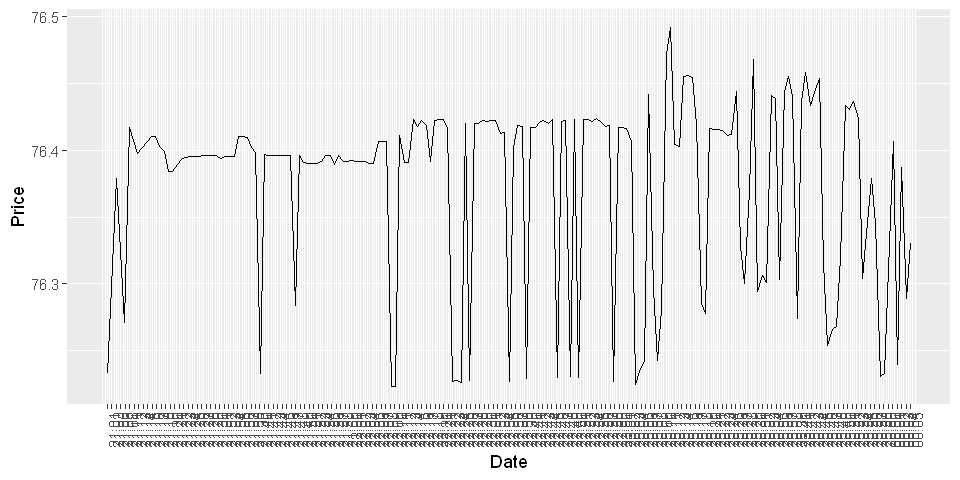

In [7]:
# Посмтроим график
df$Date <- as.numeric(df$Date)  # Переводим в секунды от 1970-01-01
labels <- as.POSIXct(df$Date, origin = "1970-01-01", tz = "GMT") %>% format("%H:%M")
nums <- seq(from = 1618866060, to = 1618877100, length.out = 180)
fig(8, 4)
ggplot(data=df, aes(x=Date, y=Price)) +
  geom_line() + 
  scale_x_continuous(breaks = nums, labels=labels, limits = c(nums[1], nums[length(nums)])) +
  theme(axis.text.x=element_text(angle=90,hjust=1))

In [8]:
# Итоговый датафрейм для SSA
df_price <- df %>% select(Price)
head(df)
head(df_price)

,Date,Time,Price
2021-04-20 00:01:00,1618866060,00:01,76.2330
2021-04-20 00:03:00,1618866180,00:03,76.3791
2021-04-20 00:05:00,1618866300,00:05,76.2710
2021-04-20 00:06:00,1618866360,00:06,76.4170
2021-04-20 00:08:00,1618866480,00:08,76.3975
2021-04-20 00:11:00,1618866660,00:11,76.4100


,Price
2021-04-20 00:01:00,76.2330
2021-04-20 00:03:00,76.3791
2021-04-20 00:05:00,76.2710
2021-04-20 00:06:00,76.4170
2021-04-20 00:08:00,76.3975
2021-04-20 00:11:00,76.4100


***

## Доходности

In [9]:
df$Returns[2:180] <- ((df$Price[2:180] - df$Price[1:179])/df$Price[1:179])  # Добавим признак доходности
head(df)

,Date,Time,Price,Returns
2021-04-20 00:01:00,1618866060,00:01,76.2330,NA
2021-04-20 00:03:00,1618866180,00:03,76.3791,0.0019164929
2021-04-20 00:05:00,1618866300,00:05,76.2710,-0.0014153086
2021-04-20 00:06:00,1618866360,00:06,76.4170,0.0019142269
2021-04-20 00:08:00,1618866480,00:08,76.3975,-0.0002551788
2021-04-20 00:11:00,1618866660,00:11,76.4100,0.0001636179


Warning message:
"Removed 1 row(s) containing missing values (geom_path)."

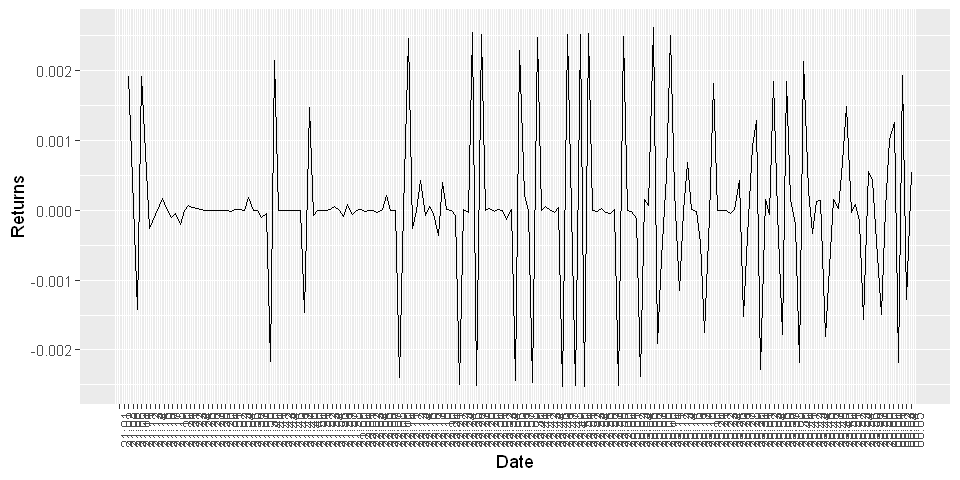

In [10]:
# Посмтроим график
df$Date <- as.numeric(df$Date)  # Переводим в секунды от 1970-01-01
labels <- as.POSIXct(df$Date, origin = "1970-01-01", tz = "GMT") %>% format("%H:%M")
nums <- seq(from = 1618866060, to = 1618877100, length.out = 180)
fig(8, 4)
ggplot(data=df, aes(x=Date, y=Returns)) +
  geom_line() + 
  scale_x_continuous(breaks = nums, labels=labels, limits = c(nums[1], nums[length(nums)])) +
  theme(axis.text.x=element_text(angle=90,hjust=1))

In [11]:
# Итоговый датафрейм для SSA
df_returns <- df %>% select(Returns)
head(df)
head(df_returns)

,Date,Time,Price,Returns
2021-04-20 00:01:00,1618866060,00:01,76.2330,NA
2021-04-20 00:03:00,1618866180,00:03,76.3791,0.0019164929
2021-04-20 00:05:00,1618866300,00:05,76.2710,-0.0014153086
2021-04-20 00:06:00,1618866360,00:06,76.4170,0.0019142269
2021-04-20 00:08:00,1618866480,00:08,76.3975,-0.0002551788
2021-04-20 00:11:00,1618866660,00:11,76.4100,0.0001636179


,Returns
2021-04-20 00:01:00,NA
2021-04-20 00:03:00,0.0019164929
2021-04-20 00:05:00,-0.0014153086
2021-04-20 00:06:00,0.0019142269
2021-04-20 00:08:00,-0.0002551788
2021-04-20 00:11:00,0.0001636179


***

***

# SSA

## Цены закрытия

In [12]:
ts_df_price <- as.ts(df_price)

In [13]:
# Стадия декомпозиции
L = 30  # Окно
s <- ssa(df_price, L = L)

In [14]:
s


Call:
ssa(x = df_price, L = L)

Series length: 180,	Window length: 30,	SVD method: eigen
Special triples:  0

Computed:
Eigenvalues: 30,	Eigenvectors: 30,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 0.02718 MiB

In [15]:
df_all_norms = as.data.frame(s$sigma)
colnames(df_all_norms) = c('values')

df_wo_first = as.data.frame((s$sigma)[2:30])
colnames(df_wo_first) = c('values')

df_log = as.data.frame(log(s$sigma))
colnames(df_log) = c('values')

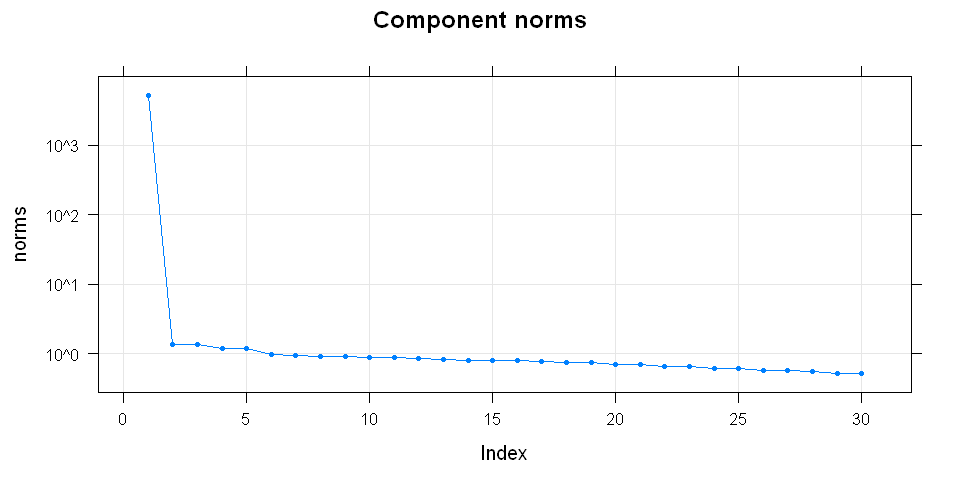

In [16]:
fig(8, 4)
plot(s) # Собственные числа

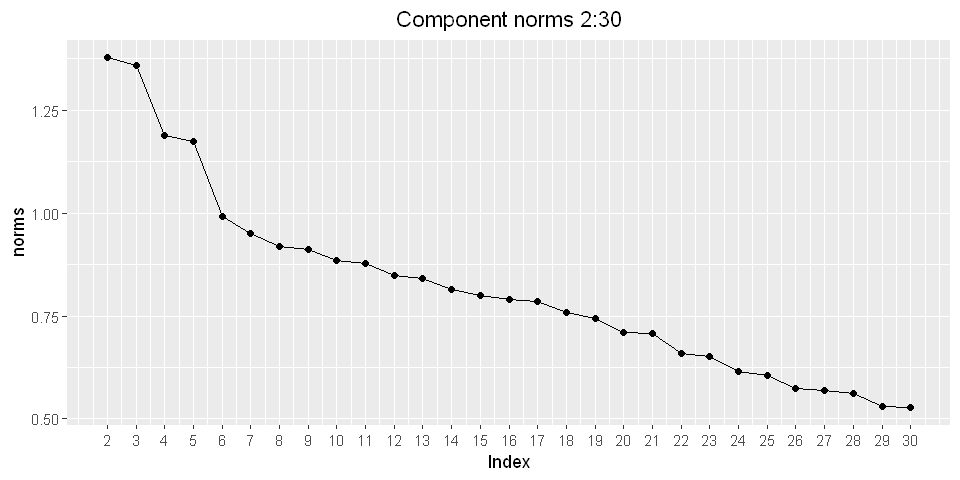

In [17]:
ggplot(data=df_wo_first, aes(x=2:(length(values)+1), y=values)) + 
    geom_line() +
    scale_x_continuous(breaks = 2:(length(df_wo_first$values)+1), labels=2:(length(df_wo_first$values)+1)) +
    geom_point() +
    ggtitle("Component norms 2:30") + xlab("Index") + ylab("norms")

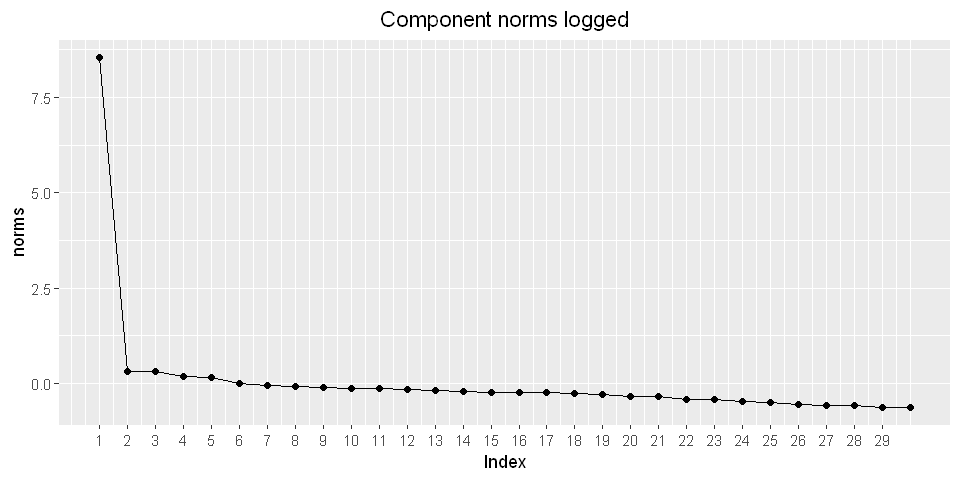

In [18]:
ggplot(data=df_log, aes(x=1:(length(values)), y=values)) + 
    geom_line() +
    scale_x_continuous(breaks = 1:(length(df_wo_first$values)), labels=1:(length(df_wo_first$values))) +
    geom_point() +
    ggtitle("Component norms logged") + xlab("Index") + ylab("norms")

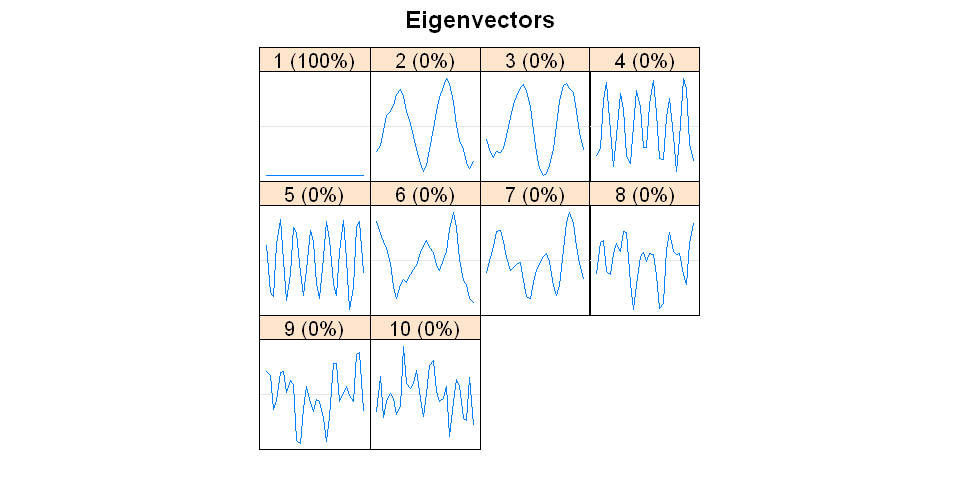

In [19]:
plot(s, type = "vectors") # Собственные векторы

### Разные способы корреляции - сравнение

__Мы будем проводить группировку через взвешенные корреляции между собственными векторами.__

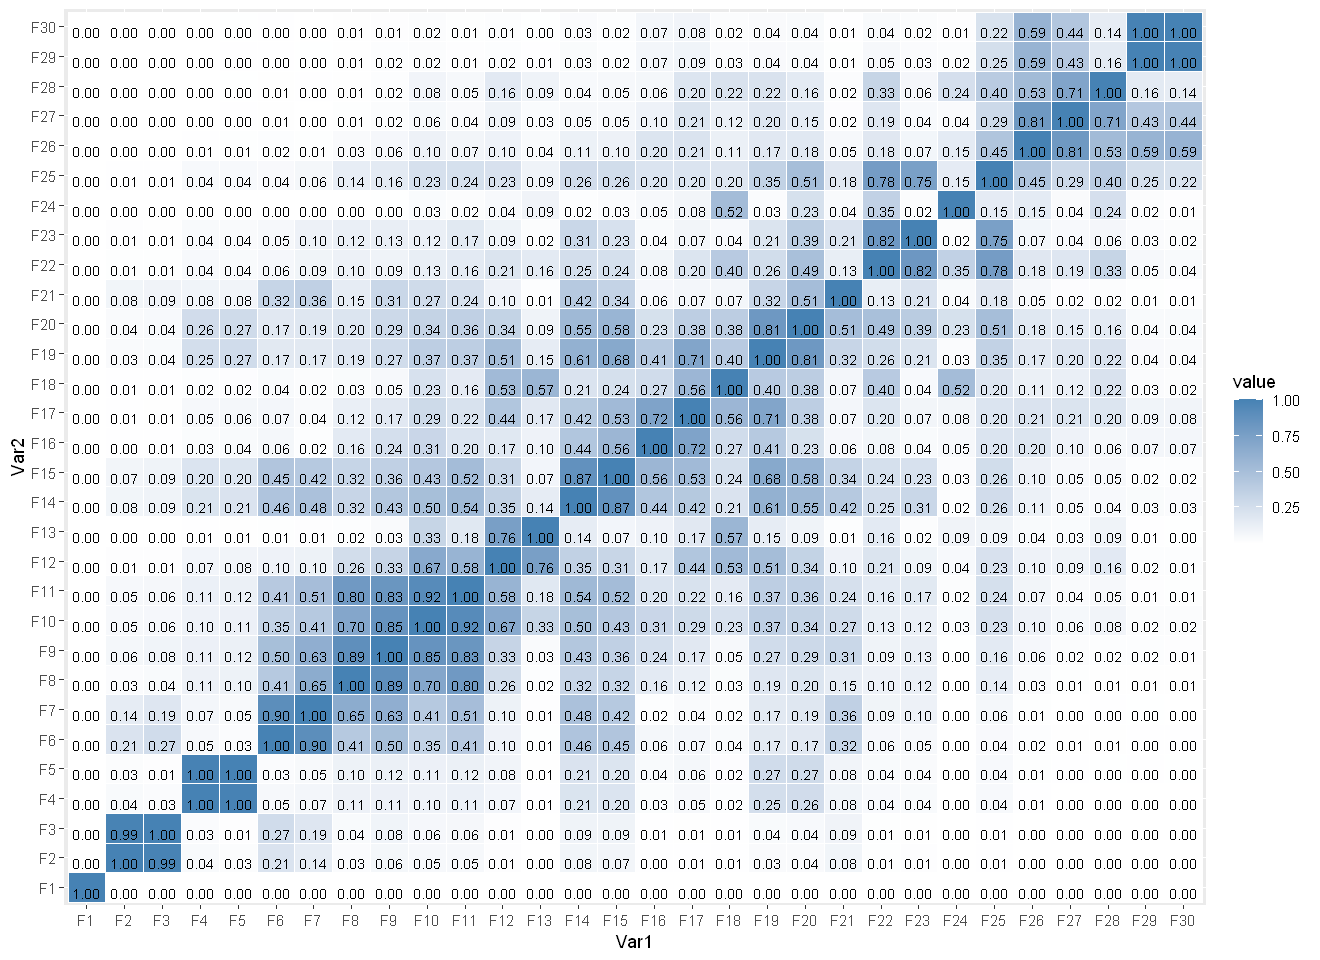

In [20]:
# Интереснее посмотреть на цветную версию матрицы корреляций

corr <- melt(wcor(s)[-31, ])  # Корреляции в более удобном формате для сравнений

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

In [21]:
head(corr)
corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))
head(corr)

Var1,Var2,value
F1,F1,1.000000e+00
F2,F1,4.008617e-06
F3,F1,4.328920e-06
F4,F1,8.354900e-07
F5,F1,8.630562e-07
F6,F1,7.048718e-06


Var1,Var2,value
1,1,1.000000e+00
2,1,4.008617e-06
3,1,4.328920e-06
4,1,8.354900e-07
5,1,8.630562e-07
6,1,7.048718e-06


#### Группировка по наибольшим корреляциям

__Находим наибольшую корреляцию в матрице корреляций, группируем соответсвующие вектора и заново считаем матрицу корреляций; продолжаем группировку до тех пор, пока наибольшая корреляция не будет меньше установленного порога (по умолчанию 0.6).__

Сделаем несколько итераций вручную.

**Шаг 1**

In [22]:
# Установим порог наименьшей допустимой корреляции
threshold = 0.6

In [23]:
# Изначально наши группы векторов, с корреляцией которых мы и работаем
# представлены в виде списка последовательных чисел от 1 до общего числа векторов

groups <- list()
for (i in 1:(nrow(corr %>% filter(Var2 == 1)))) {
    groups = append(groups, i)
    }

In [24]:
# Находим наибольшее значение корреляции
max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6)  # Равенство не работает из-за погрешности вычитания
max_corr

max_corr$value[1]

Var1,Var2,value
5,4,0.9978394
4,5,0.9978394


[1] 0.9978394

In [25]:
# Проверяем что наша корреляция не меньше установленного порога
max_corr$value[1] >= threshold

[1] TRUE

In [26]:
# Объединяем вектора с наибольшей корреляцией в списке
to_combine <- sort(c(max_corr$Var1[1:2]))

groups[[to_combine[1]]] <- unlist(c(groups[to_combine[1]], groups[to_combine[2]]))
groups[[to_combine[2]]] <- NULL

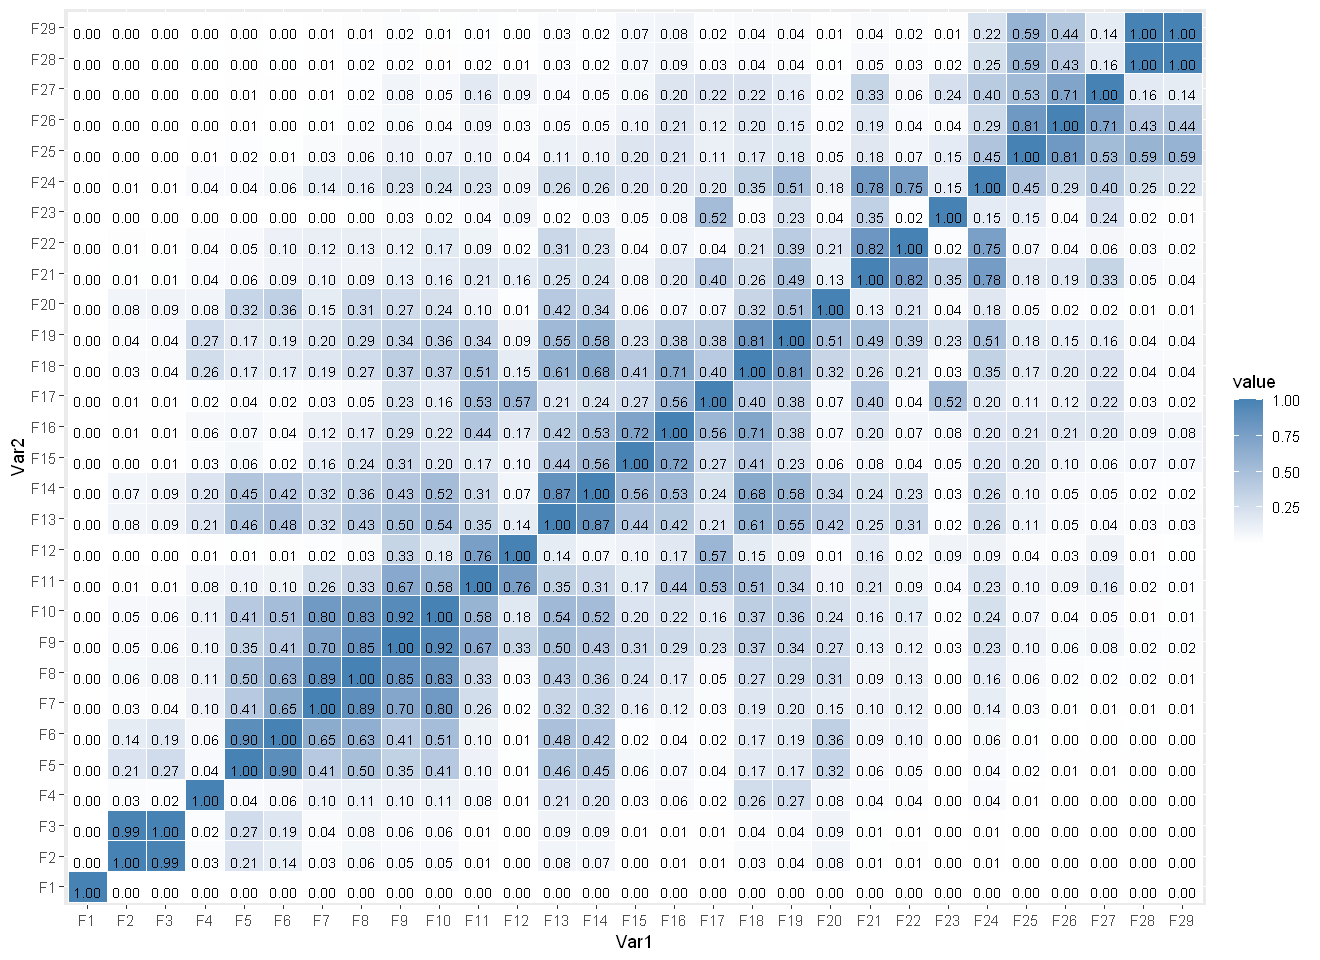

In [27]:
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Шаг 2**

In [28]:
# Находим наибольшее значение корреляции
max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6) 
max_corr

max_corr$value[1]

Var1,Var2,value
29,28,0.9966532
28,29,0.9966532


[1] 0.9966532

In [29]:
# Проверяем что наша корреляция не меньше установленного порога
max_corr$value[1] >= threshold

[1] TRUE

Несмотря на то, что в датафрейме это вектора F28 и F29 необходимо учитывать, что мы уже выкинули один вектор и пересчитали матрицу без него, а потому это все-таки 29 и 30 вектор.

In [30]:
# Объединяем вектора с наибольшей корреляцией в списке
to_combine <- sort(c(max_corr$Var1[1:2]))

groups[[to_combine[1]]] <- unlist(c(groups[to_combine[1]], groups[to_combine[2]]))
groups[[to_combine[2]]] <- NULL

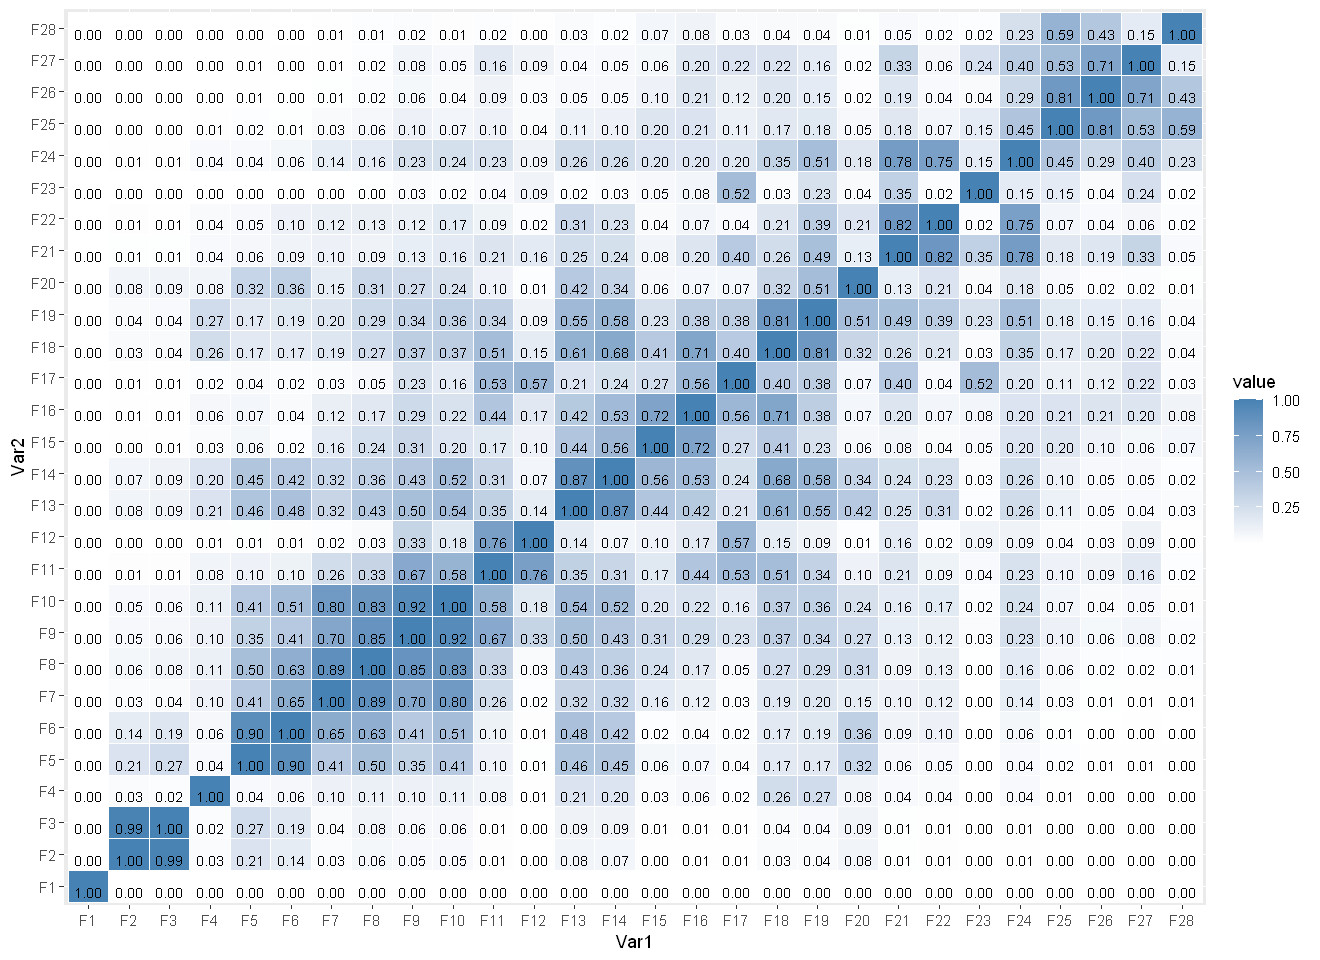

In [31]:
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Шаг 3**

In [32]:
# Находим наибольшее значение корреляции
max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6) 
max_corr

max_corr$value[1]

Var1,Var2,value
3,2,0.9932955
2,3,0.9932955


[1] 0.9932955

In [33]:
# Проверяем что наша корреляция не меньше установленного порога
max_corr$value[1] >= threshold

[1] TRUE

In [34]:
# Объединяем вектора с наибольшей корреляцией в списке
to_combine <- sort(c(max_corr$Var1[1:2]))

groups[[to_combine[1]]] <- unlist(c(groups[to_combine[1]], groups[to_combine[2]]))
groups[[to_combine[2]]] <- NULL

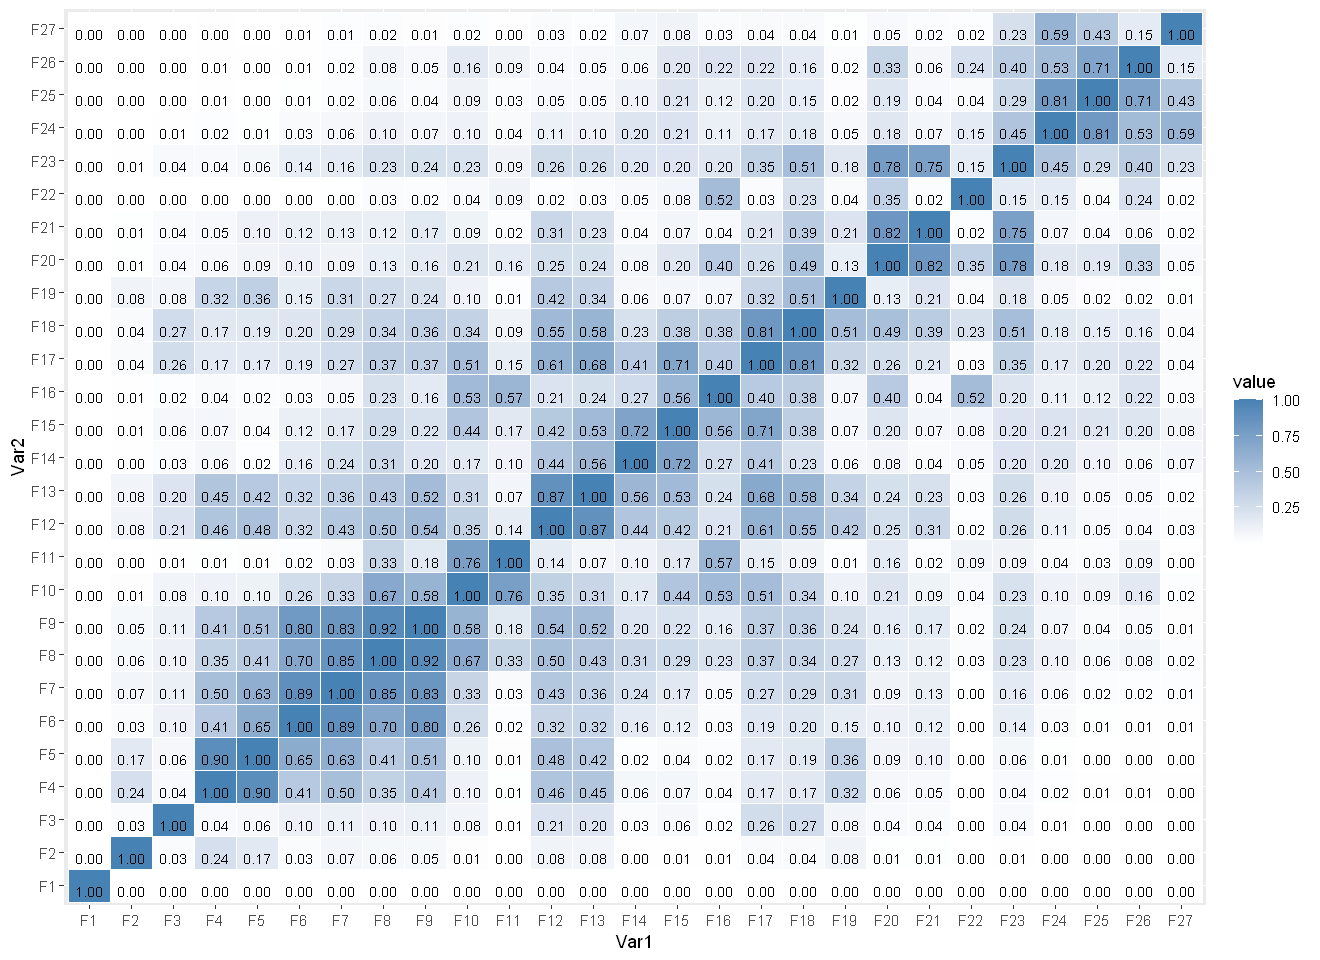

In [35]:
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Автоматизируем процесс и посмотрим на нашу матрицу корреляций через 5 итераций.**

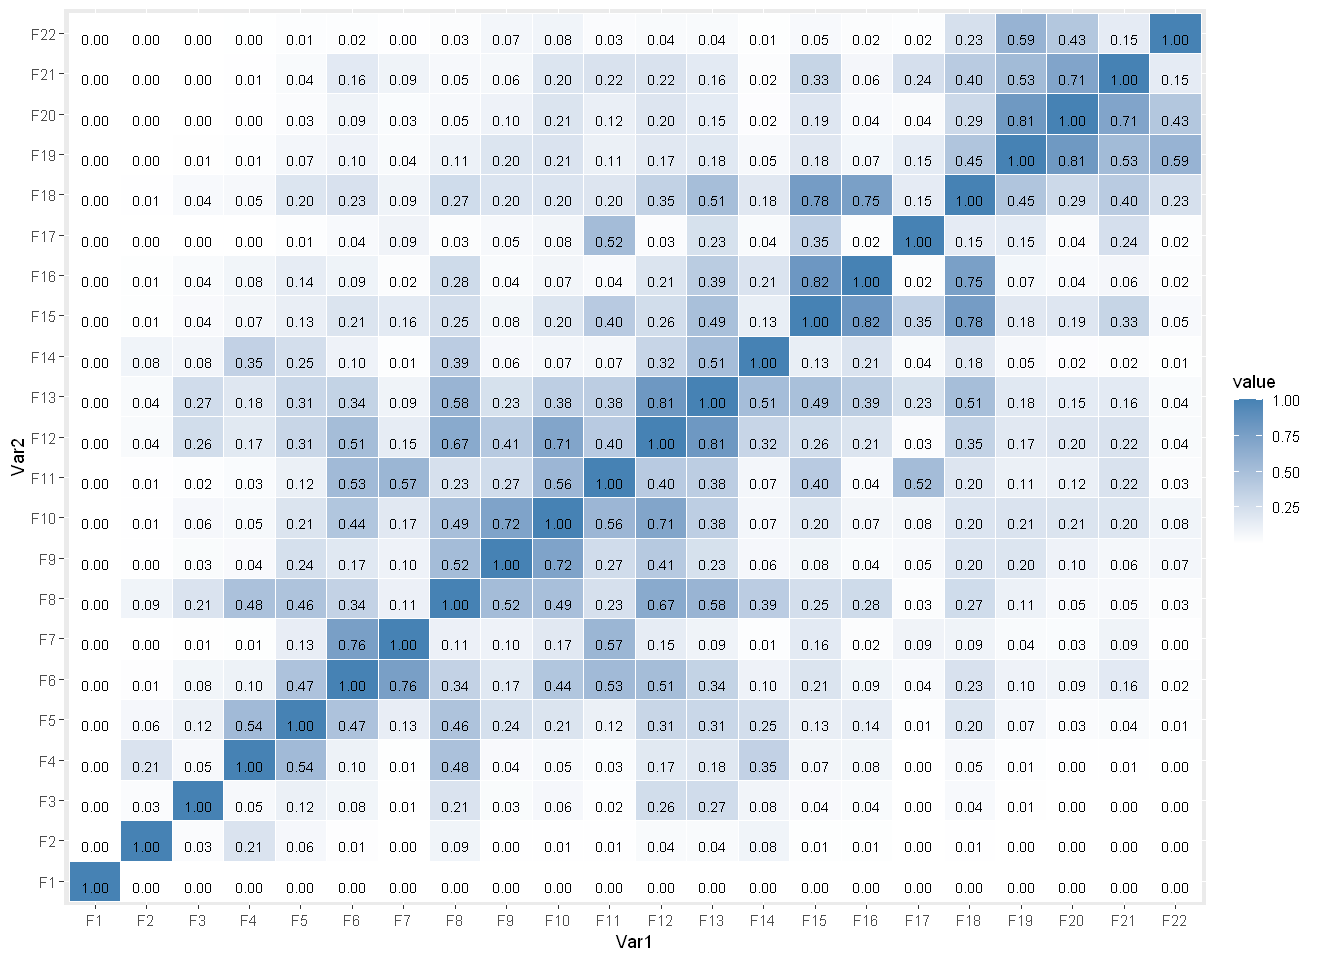

In [36]:
for (i in 1:5) {
    max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6)  # Находим наибольшее значение корреляции
    if (max_corr$value[1] >= threshold) {  # Проверяем что наша корреляция не меньше установленного порога
        to_combine <- sort(c(max_corr$Var1[1:2]))  # Объединяем вектора с наибольшей корреляцией в списке
        groups[[to_combine[1]]] <- unlist(c(groups[to_combine[1]], groups[to_combine[2]]))
        groups[[to_combine[2]]] <- NULL
        corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])  # Пересчитываем матрицу корреляций
    }
}

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

In [37]:
groups

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12

[[7]]
[1] 13

[[8]]
[1] 14 15

[[9]]
[1] 16

[[10]]
[1] 17

[[11]]
[1] 18

[[12]]
[1] 19

[[13]]
[1] 20

[[14]]
[1] 21

[[15]]
[1] 22

[[16]]
[1] 23

[[17]]
[1] 24

[[18]]
[1] 25

[[19]]
[1] 26

[[20]]
[1] 27

[[21]]
[1] 28

[[22]]
[1] 29 30

**Продолжаем до тех пор, пока максимальная корреляция между векторами выше установленного порога.**

Напишем функцию которая проводит эту операцию в автоматическом режиме. На вход она будет принимать порог threshold и изначальную матрицу корреляций. 

In [38]:
group_by_max_corr <- function(corr, threshold=0.6) {
    # Изначально наши группы векторов, с корреляцией которых мы и работаем
    # представлены в виде списка последовательных чисел от 1 до общего числа векторов
    corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
    corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))
    
    groups <- list()
    for (i in 1:(nrow(corr %>% filter(Var2 == 1)))) {
        groups = append(groups, i)
    }
    
    max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6)  # Находим наибольшее значение корреляции
    while (max_corr$value[1] >= threshold) {
        to_combine <- sort(c(max_corr$Var1[1:2]))  # Объединяем вектора с наибольшей корреляцией в списке
        groups[[to_combine[1]]] <- unlist(c(groups[to_combine[1]], groups[to_combine[2]]))
        groups[[to_combine[2]]] <- NULL
        corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])  # Пересчитываем матрицу корреляций
        corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
        corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))
        max_corr <- corr %>% filter(abs(value - max(corr$value[corr$value<1])) < 10e-6)
    }
    return (groups)
}

In [39]:
corr <- melt(wcor(s)[-31, ])

In [40]:
group_by_max_corr(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15 19 20

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 21

[[11]]
[1] 22 23 25

[[12]]
[1] 24

[[13]]
[1] 26 27 28

[[14]]
[1] 29 30

#### Группировка по кластерам. Группировка по звеньям (цепная группировка)

__Начиная с первого вектора, смотрим его попарные корреляции с n соседними векторами, если корреляция хотя бы с одним соседом больше заданного порога threshold, то группируем этот вектор **с ближайшим соседом** и затем, когда кластер уже образован и следующий сосед уже не скоррелирован с предыдущими, пересчитываем матрицу корреляции; повторяем до тех пор, пока нельзя будет образовать ни один кластер.__

__Группировка по звеньям очень похожа на группировку по кластерам с тем отличием, что тут число соседей всегда равно 1 и при этом матрица корреляции пересчитывается каждый раз, когда два каких-либо векторов удается сгруппировать.__

Так же как и в предыдущем случае сначала посмотрим на группировку по шагам.

In [41]:
corr <- melt(wcor(s)[-31, ])

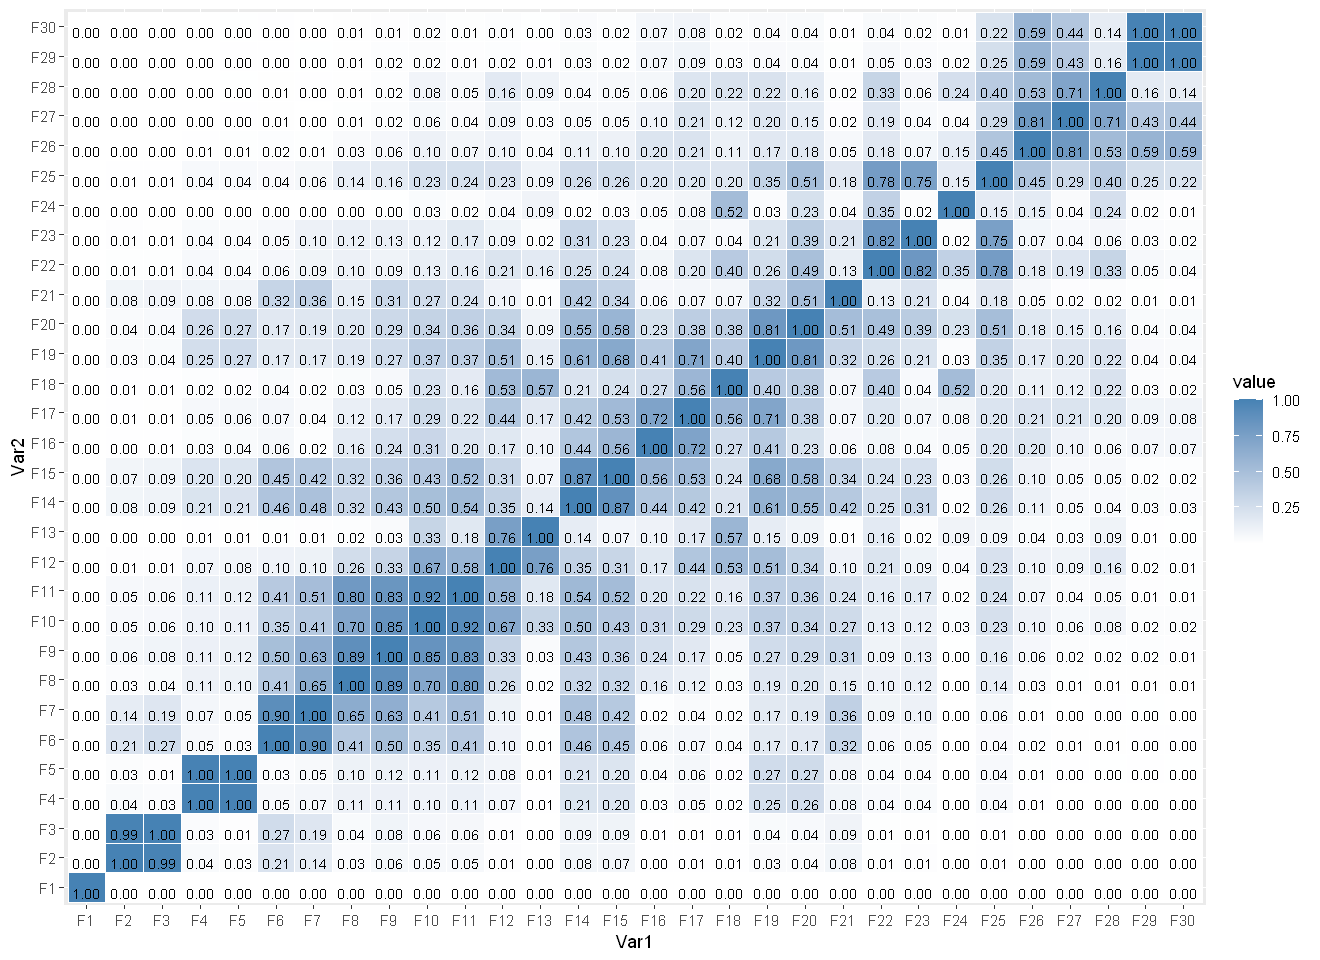

In [42]:
fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Шаг 1**

In [43]:
# Установим порог наименьшей допустимой корреляции
threshold = 0.6

In [44]:
# Изначально наши группы векторов, с корреляцией которых мы и работаем
# представлены в виде списка последовательных чисел от 1 до общего числа векторов

groups <- list()
for (i in 1:1:(nrow(corr %>% filter(Var2 == 1)))) {
    groups = append(groups, i)
    }

In [45]:
# Работаем с первым вектором
k = 1
corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций по первому вектору
corr_vector

Var1,Var2,value
1,1,1.000000e+00
2,1,4.008617e-06
3,1,4.328920e-06
4,1,8.354900e-07
5,1,8.630562e-07
6,1,7.048718e-06
7,1,7.128745e-06
8,1,1.984430e-06
9,1,5.761689e-06
10,1,5.427152e-06


In [46]:
# Объединяем соседей с большой корреляцией (зададим число соседей равное 3)
to_combine = c(groups[[1]])
len_start = length(to_combine)
j = k + 1
significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
while ((significant_corr) & (j <= (nrow(corr_vector) - 2))) {
    to_combine = c(to_combine, groups[[j]])
    j = j + 1
    significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
}

In [47]:
to_combine
length(to_combine)

# Так как первый вектор группировать ни с каким другим не надо, то наши группы векторов и матрица корреляций не изименятся 
# и ничего пересчитывать не надо, просто переходим к следующему шагу

[1] 1

[1] 1

**Шаг 2**

In [48]:
# Работаем со вторым вектором
k = 2
corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций по второму вектору

In [49]:
# Объединяем соседей с большой корреляцией
to_combine = c(groups[[2]])
len_start = length(to_combine)
j = k + 1
significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
while ((significant_corr) & (j <= (nrow(corr_vector) - 2))) {
    to_combine = c(to_combine, groups[[j]])
    j = j + 1
    significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
}

In [50]:
# Введем проверку длину группы to_combine, и если она будет больше 2, то будем пересчитывать группы и матрицу корреляций
if (length(to_combine) > len_start) {
    groups[[to_combine[1]]] <- to_combine
    for (i in (k+length(to_combine)-len_start):(k+1)) {
       groups[[i]] <- NULL 
    }
}

In [51]:
groups

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4

[[4]]
[1] 5

[[5]]
[1] 6

[[6]]
[1] 7

[[7]]
[1] 8

[[8]]
[1] 9

[[9]]
[1] 10

[[10]]
[1] 11

[[11]]
[1] 12

[[12]]
[1] 13

[[13]]
[1] 14

[[14]]
[1] 15

[[15]]
[1] 16

[[16]]
[1] 17

[[17]]
[1] 18

[[18]]
[1] 19

[[19]]
[1] 20

[[20]]
[1] 21

[[21]]
[1] 22

[[22]]
[1] 23

[[23]]
[1] 24

[[24]]
[1] 25

[[25]]
[1] 26

[[26]]
[1] 27

[[27]]
[1] 28

[[28]]
[1] 29

[[29]]
[1] 30

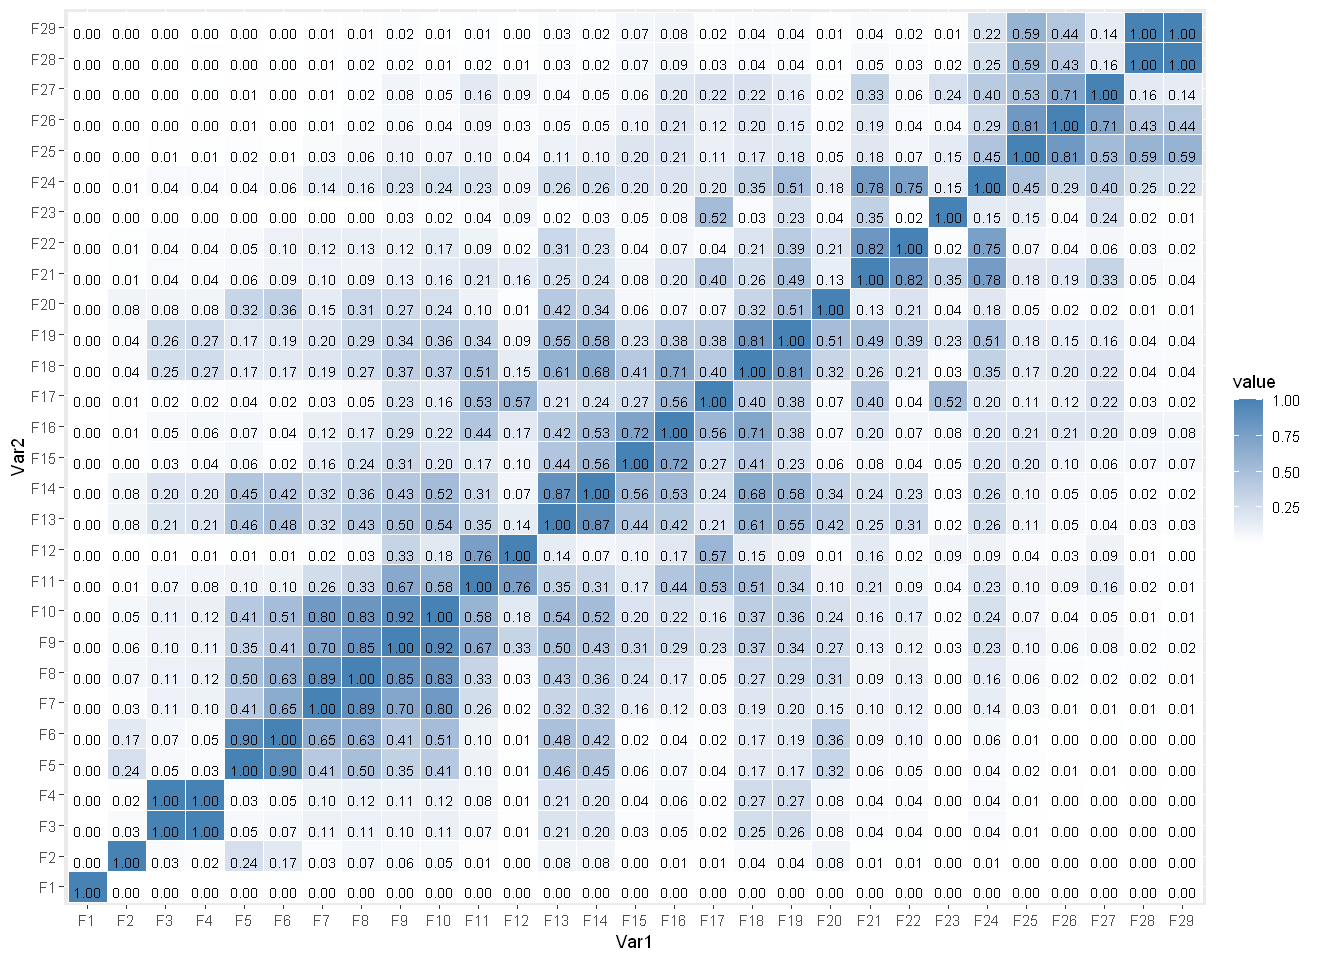

In [52]:
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Шаг 3**

In [53]:
# Работаем снова со вторым объединенным вектором, так как мы пересчитывали матрицу корреляций
k = 2
corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций по второму вектору

In [54]:
# Объединяем соседей с большой корреляцией
to_combine = c(groups[[k]])
len_start = length(to_combine)
j = k + 1
significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
while ((significant_corr) & (j <= (nrow(corr_vector) - 2))) {
    to_combine = c(to_combine, groups[[j]])
    j = j + 1
    significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
}

In [55]:
if (length(to_combine) > len_start) {
    groups[[to_combine[1]]] <- to_combine
    for (i in (k+length(to_combine)-len_start):(k+1)) {
       groups[[i]] <- NULL 
    }
}

In [56]:
groups

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4

[[4]]
[1] 5

[[5]]
[1] 6

[[6]]
[1] 7

[[7]]
[1] 8

[[8]]
[1] 9

[[9]]
[1] 10

[[10]]
[1] 11

[[11]]
[1] 12

[[12]]
[1] 13

[[13]]
[1] 14

[[14]]
[1] 15

[[15]]
[1] 16

[[16]]
[1] 17

[[17]]
[1] 18

[[18]]
[1] 19

[[19]]
[1] 20

[[20]]
[1] 21

[[21]]
[1] 22

[[22]]
[1] 23

[[23]]
[1] 24

[[24]]
[1] 25

[[25]]
[1] 26

[[26]]
[1] 27

[[27]]
[1] 28

[[28]]
[1] 29

[[29]]
[1] 30

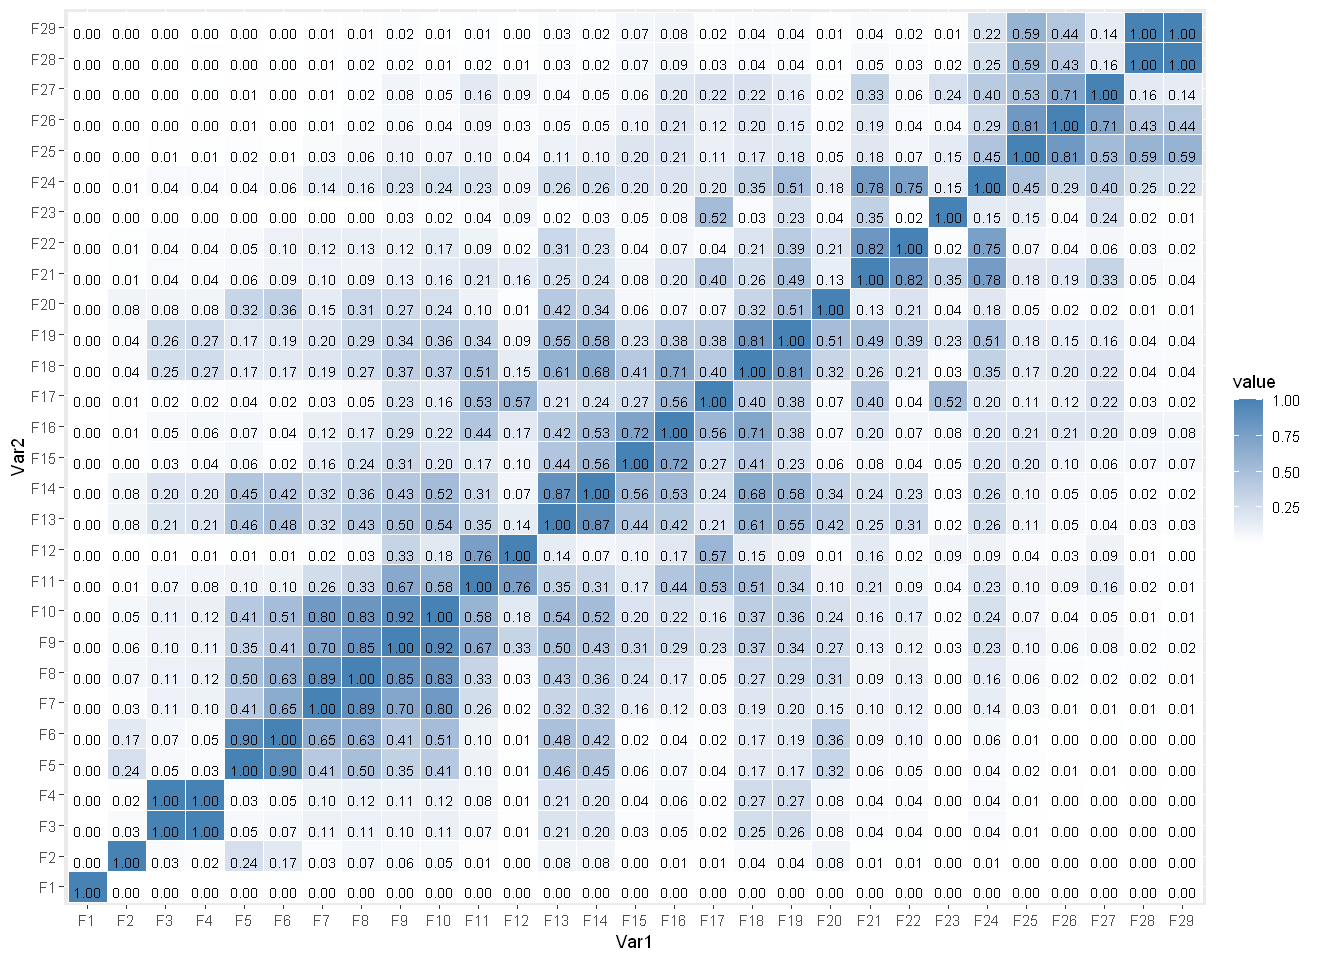

In [57]:
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Шаг 4**

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6

[[5]]
[1] 7

[[6]]
[1] 8

[[7]]
[1] 9

[[8]]
[1] 10

[[9]]
[1] 11

[[10]]
[1] 12

[[11]]
[1] 13

[[12]]
[1] 14

[[13]]
[1] 15

[[14]]
[1] 16

[[15]]
[1] 17

[[16]]
[1] 18

[[17]]
[1] 19

[[18]]
[1] 20

[[19]]
[1] 21

[[20]]
[1] 22

[[21]]
[1] 23

[[22]]
[1] 24

[[23]]
[1] 25

[[24]]
[1] 26

[[25]]
[1] 27

[[26]]
[1] 28

[[27]]
[1] 29

[[28]]
[1] 30

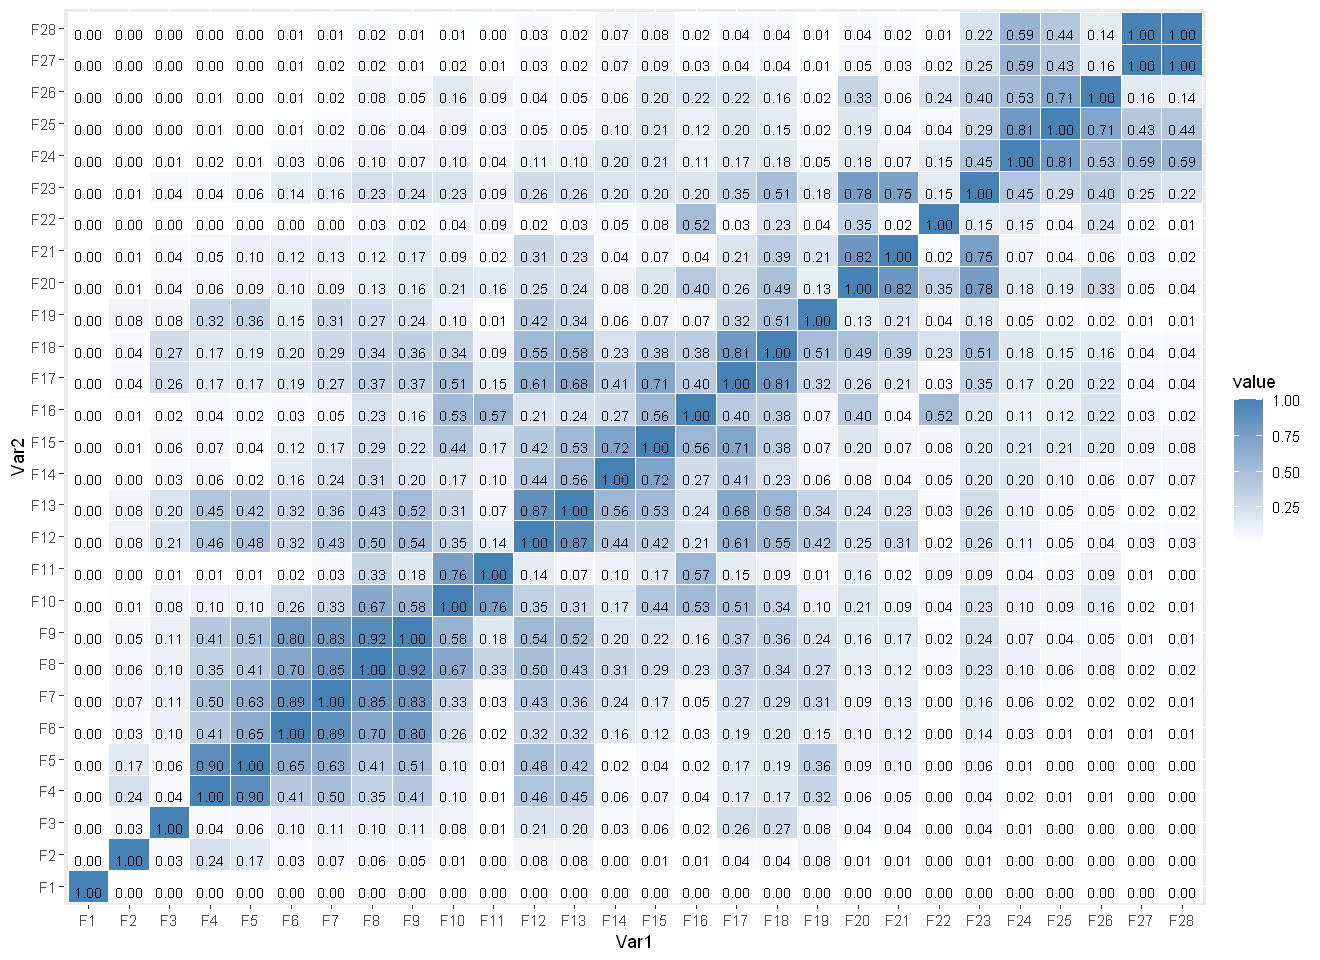

In [58]:
# Работаем снова с третьим объединенным вектором
k = 3
corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций по третьему вектору
# Объединяем соседей с большой корреляцией
to_combine = c(groups[[k]])
len_start = length(to_combine)
j = k + 1
significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
while ((significant_corr) & (j <= (nrow(corr_vector) - 2))) {
    to_combine = c(to_combine, groups[[j]])
    j = j + 1
    significant_corr = ((corr_vector$value[j] >= threshold) | (corr_vector$value[j + 1] >= threshold) | (corr_vector$value[j + 2] >= threshold))
}
if (length(to_combine) > len_start) {
    groups[[k]] <- to_combine
    for (i in (k+length(to_combine)-len_start):(k+1)) {
       groups[[i]] <- NULL 
    }
}
groups
# Пересчитываем матрицу корреляций
corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

**Продолжаем до тех пор, пока все кластеры не будут определены и получены.**

Напишем функцию которая проводит эту операцию в автоматическом режиме. На вход она будет принимать количество соседей n, порог threshold и изначальную матрицу корреляций. 

In [59]:
corr_clusters <- function(corr, n=3, threshold=0.6) {
    corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
    corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

    # Изначально наши группы векторов, с корреляцией которых мы и работаем
    # представлены в виде списка последовательных чисел от 1 до общего числа векторов
    groups <- list()
    for (i in 1:(nrow(corr %>% filter(Var2 == 1)))) {
        groups = append(groups, i)
    }
    
    k = 1  # Начинаем с первого вектора
    
    while (k < length(groups)) {
        corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций 
        to_combine = c(groups[[k]])  # Сначала добавляем первый вектор в группу для объединения 
        len_start = length(to_combine)
        j = k + 1

        # Возвращаем TRUE, если корреляция с одним из n соседей больше порога
        significant_corr <- FALSE
        for (i in j:(j+n-1)) {
            significant_corr = significant_corr | (corr_vector$value[i] >= threshold)
        }

        # Объединяем соседние векторы пока корреляция значительная
        while ((significant_corr) & (j <= (nrow(corr_vector) - 2))) {
            to_combine = c(to_combine, groups[[j]])
            j = j + 1
            significant_corr <- FALSE
            for (i in j:(j+n-1)) {
                significant_corr = significant_corr | (corr_vector$value[i] >= threshold)
            }
        }

        # Если нам удалось сгруппировать векторы, мы пересчитываем матрицу корреляций и список групп
        # Если не удалось - то переходим к следующему вектору
        if (length(to_combine) > len_start) {
            groups[[k]] <- to_combine
            for (i in (k+length(to_combine)-len_start):(k+1)) {
               groups[[i]] <- NULL 
            }
            corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])
            corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
            corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))
        } else {
            k <- k + 1
        }       
    }
    return (groups)
}

In [60]:
corr <- melt(wcor(s)[-31, ])

In [61]:
corr_clusters(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 24 25

[[13]]
[1] 26 27 28

[[14]]
[1] 29

[[15]]
[1] 30

**И наконец функция для цепной группировки. Напоминаю, что отличия 2: число соседей в данном случае будем принимать всегда за 1, и, вдобавок к этому, будем пересчитывать матрицу корреляции каждый раз, когда нам удается сгруппировать пару векторов.**

In [62]:
corr_chain <- function(corr, threshold=0.6) {
    corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
    corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

    # Изначально наши группы векторов, с корреляцией которых мы и работаем
    # представлены в виде списка последовательных чисел от 1 до общего числа векторов
    groups <- list()
    for (i in 1:(nrow(corr %>% filter(Var2 == 1)))) {
        groups = append(groups, i)
    }
    
    k = 1  # Начинаем с первого вектора
    
    while (k < length(groups)) {
        corr_vector <- corr %>% filter(Var2 == k)  # Фильтруем матрицу корреляций 
        to_combine = c(groups[[k]])  # Сначала добавляем первый вектор в группу для объединения 
        j = k + 1

        # Возвращаем TRUE, если корреляция с соседним вектором больше порога
        significant_corr = (corr_vector$value[j] >= threshold)

        # Объединяем соседние векторы и пересчитываем матрицу корреляций и список групп, если корреляция значительная
        if (significant_corr) {
            to_combine = c(to_combine, groups[[j]])
            groups[[k]] <- to_combine
            groups[[k+1]] <- NULL
            corr <- melt(wcor(s, groups=groups)[-(length(groups) + 1), ])
            corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
            corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))
        } else {
            k <- k + 1
        }
    }
    return (groups)
}

In [63]:
corr_chain(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23

[[13]]
[1] 24

[[14]]
[1] 25

[[15]]
[1] 26 27 28

[[16]]
[1] 29 30

#### Сравнение способов группировок

**Итого нами были написаны три функции. Сравним наши способы группировки на разных данных (цены закрытия в текущем периоде и два другим временных периода длиной 180 минут) при разных значениях порога и числа соседей в случае кластерной группировки.**

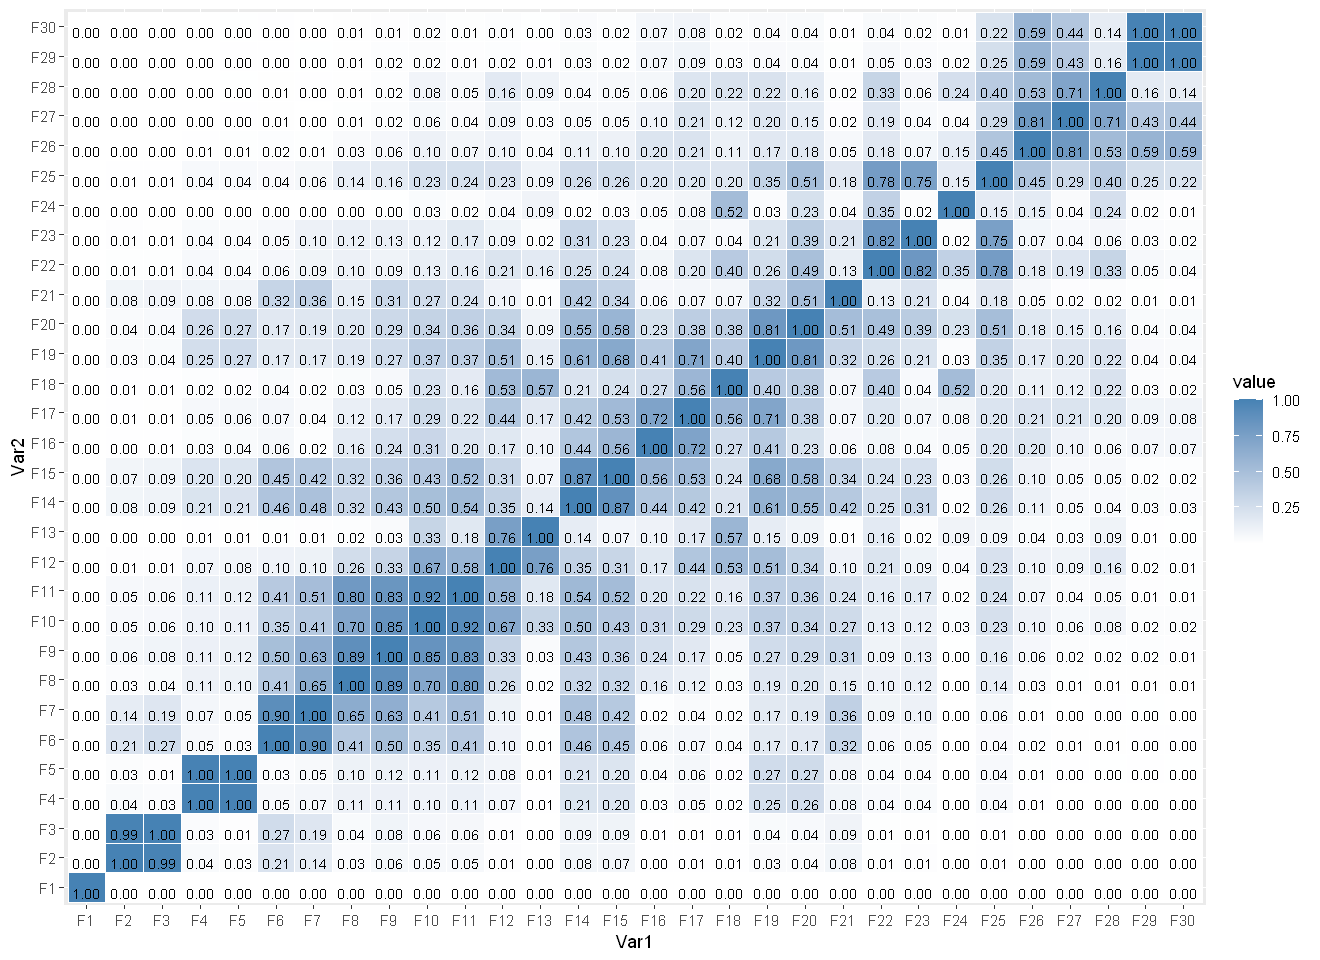

In [64]:
# Исходная матрица корреляции

corr <- melt(wcor(s)[-31, ])

fig(11, 8)
ggplot(data = corr, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

corr$Var1 <- as.numeric(substr(corr$Var1, 2, 4))
corr$Var2 <- as.numeric(substr(corr$Var2, 2, 4))

In [65]:
# Группировка по наибольшм корреляциям (threshold = 0.6)

corr <- melt(wcor(s)[-31, ])
group_by_max_corr(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15 19 20

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 21

[[11]]
[1] 22 23 25

[[12]]
[1] 24

[[13]]
[1] 26 27 28

[[14]]
[1] 29 30

In [66]:
# Группировка по наибольшм корреляциям (threshold = 0.7)

corr <- melt(wcor(s)[-31, ])
group_by_max_corr(corr, threshold=0.7)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 25

[[13]]
[1] 24

[[14]]
[1] 26 27

[[15]]
[1] 28

[[16]]
[1] 29 30

In [67]:
# Группировка по наибольшм корреляциям (threshold = 0.8)

corr <- melt(wcor(s)[-31, ])
group_by_max_corr(corr, threshold=0.8)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12

[[7]]
[1] 13

[[8]]
[1] 14 15

[[9]]
[1] 16

[[10]]
[1] 17

[[11]]
[1] 18

[[12]]
[1] 19 20

[[13]]
[1] 21

[[14]]
[1] 22 23

[[15]]
[1] 24

[[16]]
[1] 25

[[17]]
[1] 26 27

[[18]]
[1] 28

[[19]]
[1] 29 30

In [68]:
# Группировка по наибольшм корреляциям (threshold = 0.9)

corr <- melt(wcor(s)[-31, ])
group_by_max_corr(corr, threshold=0.9)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1] 8

[[6]]
[1] 9

[[7]]
[1] 10 11

[[8]]
[1] 12

[[9]]
[1] 13

[[10]]
[1] 14

[[11]]
[1] 15

[[12]]
[1] 16

[[13]]
[1] 17

[[14]]
[1] 18

[[15]]
[1] 19

[[16]]
[1] 20

[[17]]
[1] 21

[[18]]
[1] 22

[[19]]
[1] 23

[[20]]
[1] 24

[[21]]
[1] 25

[[22]]
[1] 26

[[23]]
[1] 27

[[24]]
[1] 28

[[25]]
[1] 29 30

In [69]:
# Цепная группировка (threshold=0.6)

corr <- melt(wcor(s)[-31, ])
corr_chain(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23

[[13]]
[1] 24

[[14]]
[1] 25

[[15]]
[1] 26 27 28

[[16]]
[1] 29 30

In [70]:
# Цепная группировка (threshold=0.7)

corr <- melt(wcor(s)[-31, ])
corr_chain(corr, threshold=0.7)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23

[[13]]
[1] 24

[[14]]
[1] 25

[[15]]
[1] 26 27

[[16]]
[1] 28

[[17]]
[1] 29 30

In [71]:
# Цепная группировка (threshold=0.8)

corr <- melt(wcor(s)[-31, ])
corr_chain(corr, threshold=0.8)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1] 8 9

[[6]]
[1] 10 11

[[7]]
[1] 12

[[8]]
[1] 13

[[9]]
[1] 14 15

[[10]]
[1] 16

[[11]]
[1] 17

[[12]]
[1] 18

[[13]]
[1] 19 20

[[14]]
[1] 21

[[15]]
[1] 22 23

[[16]]
[1] 24

[[17]]
[1] 25

[[18]]
[1] 26 27

[[19]]
[1] 28

[[20]]
[1] 29 30

In [72]:
# Цепная группировка (threshold=0.9)

corr <- melt(wcor(s)[-31, ])
corr_chain(corr, threshold=0.9)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1] 8

[[6]]
[1] 9

[[7]]
[1] 10 11

[[8]]
[1] 12

[[9]]
[1] 13

[[10]]
[1] 14

[[11]]
[1] 15

[[12]]
[1] 16

[[13]]
[1] 17

[[14]]
[1] 18

[[15]]
[1] 19

[[16]]
[1] 20

[[17]]
[1] 21

[[18]]
[1] 22

[[19]]
[1] 23

[[20]]
[1] 24

[[21]]
[1] 25

[[22]]
[1] 26

[[23]]
[1] 27

[[24]]
[1] 28

[[25]]
[1] 29 30

__Для кластерной группировки рассмотрим n = 2, 3 и threshold = 0.6, 0.7, 0.8, 0.9__

In [73]:
# Кластерная группировка (n=3, threshold=0.6)

corr_clusters(corr)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 24 25

[[13]]
[1] 26 27 28

[[14]]
[1] 29

[[15]]
[1] 30

In [74]:
# Кластерная группировка (n=3, threshold=0.7)

corr_clusters(corr, threshold=0.7)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 24 25

[[13]]
[1] 26 27

[[14]]
[1] 28

[[15]]
[1] 29

[[16]]
[1] 30

In [75]:
# Кластерная группировка (n=3, threshold=0.8)

corr_clusters(corr, threshold=0.8)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12

[[7]]
[1] 13

[[8]]
[1] 14 15

[[9]]
[1] 16

[[10]]
[1] 17

[[11]]
[1] 18

[[12]]
[1] 19 20

[[13]]
[1] 21

[[14]]
[1] 22 23

[[15]]
[1] 24

[[16]]
[1] 25

[[17]]
[1] 26 27

[[18]]
[1] 28

[[19]]
[1] 29

[[20]]
[1] 30

In [76]:
# Кластерная группировка (n=3, threshold=0.9)

corr_clusters(corr, threshold=0.9)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1] 8

[[6]]
[1] 9

[[7]]
[1] 10 11

[[8]]
[1] 12

[[9]]
[1] 13

[[10]]
[1] 14

[[11]]
[1] 15

[[12]]
[1] 16

[[13]]
[1] 17

[[14]]
[1] 18

[[15]]
[1] 19

[[16]]
[1] 20

[[17]]
[1] 21

[[18]]
[1] 22

[[19]]
[1] 23

[[20]]
[1] 24

[[21]]
[1] 25

[[22]]
[1] 26

[[23]]
[1] 27

[[24]]
[1] 28

[[25]]
[1] 29

[[26]]
[1] 30

In [77]:
# Кластерная группировка (n=2, threshold=0.6)

corr_clusters(corr, n=2)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 24 25

[[13]]
[1] 26 27 28

[[14]]
[1] 29

[[15]]
[1] 30

In [78]:
# Кластерная группировка (n=2, threshold=0.7)

corr_clusters(corr, n=2, threshold=0.7)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 24 25

[[13]]
[1] 26 27

[[14]]
[1] 28

[[15]]
[1] 29

[[16]]
[1] 30

In [79]:
# Кластерная группировка (n=2, threshold=0.8)

corr_clusters(corr, n=2, threshold=0.8)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12

[[7]]
[1] 13

[[8]]
[1] 14 15

[[9]]
[1] 16

[[10]]
[1] 17

[[11]]
[1] 18

[[12]]
[1] 19 20

[[13]]
[1] 21

[[14]]
[1] 22 23

[[15]]
[1] 24

[[16]]
[1] 25

[[17]]
[1] 26 27

[[18]]
[1] 28

[[19]]
[1] 29

[[20]]
[1] 30

In [80]:
# Кластерная группировка (n=2, threshold=0.9)

corr_clusters(corr, n=2, threshold=0.9)

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1] 8

[[6]]
[1] 9

[[7]]
[1] 10 11

[[8]]
[1] 12

[[9]]
[1] 13

[[10]]
[1] 14

[[11]]
[1] 15

[[12]]
[1] 16

[[13]]
[1] 17

[[14]]
[1] 18

[[15]]
[1] 19

[[16]]
[1] 20

[[17]]
[1] 21

[[18]]
[1] 22

[[19]]
[1] 23

[[20]]
[1] 24

[[21]]
[1] 25

[[22]]
[1] 26

[[23]]
[1] 27

[[24]]
[1] 28

[[25]]
[1] 29

[[26]]
[1] 30

**Выводы по текущему датасету:**

- Группировка по наибольшей корреляции хорошо улавливает достаточно сильную взаимосвязь между 22, 23 и 25 компонентами, а так же между 14, 15, 19, 20 компонентами (что не улавливают другие способы группировки, хотя по матрице корреляций заметно, что их сгруппировать все-таки стоит)
- Мне кажется, что оптимальным порогом для всех способов группировки является уровень 0.6-0.7, так как при уровнях 0.8-0.9 мы начинаем терять связи между компонентами, которые могут быть значимыми
- Цепная группировка дает практически те же результаты, что и кластерная

В дальнейшем я бы использовала группировку по большей корреляции, так как она улавливает не самые очевидные взаимосвязи между векторами.

**Проблема:** в кластерной группировке не объединяются последние вектора. Нужно их объединять как-то по-другому, так как мы в цикле должны проверить n соседей, что, очевидно, невозможно, для последних векторов. В питоне это можно было обойти через конструкцию try-except.

__Рассмотрим теперь методы группировки на другом отрезке времени по 180 минут__

Сначала я хотела рассмотреть 2-3 других отрезка, но уже после первого поняла, что уже можно сделать выводы и что дальнейшие попытки будут их лишь подтверждать.

In [81]:
df_2 <- data[190:369, ]
df_3 <- data[380:559, ]

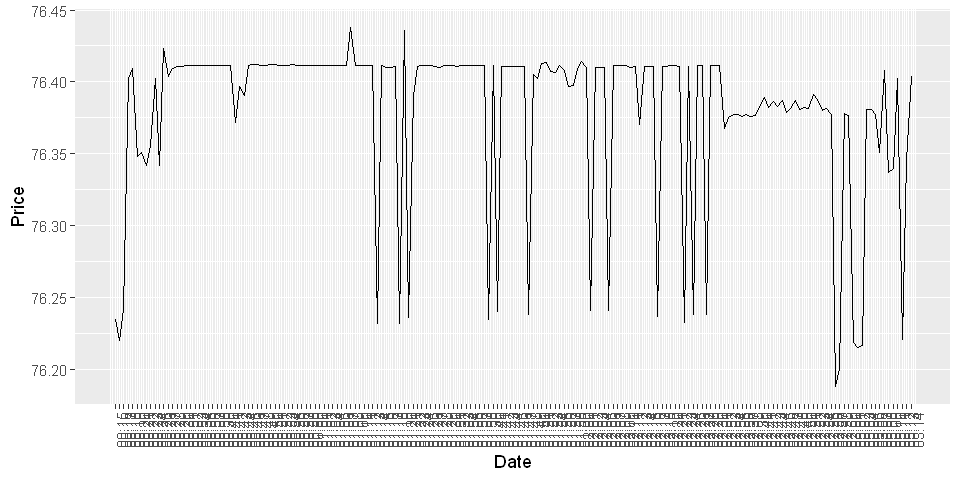

In [82]:
# Построим график df_2
df_2$Date <- as.numeric(df_2$Date)  # Переводим в секунды от 1970-01-01
labels <- as.POSIXct(df_2$Date, origin = "1970-01-01", tz = "GMT") %>% format("%H:%M")
nums <- seq(from = 1618877700, to = 1618888440, length.out = 180)
fig(8, 4)
ggplot(data=df_2, aes(x=Date, y=Price)) +
  geom_line() + 
  scale_x_continuous(breaks = nums, labels=labels, limits = c(nums[1], nums[length(nums)])) +
  theme(axis.text.x=element_text(angle=90,hjust=1))

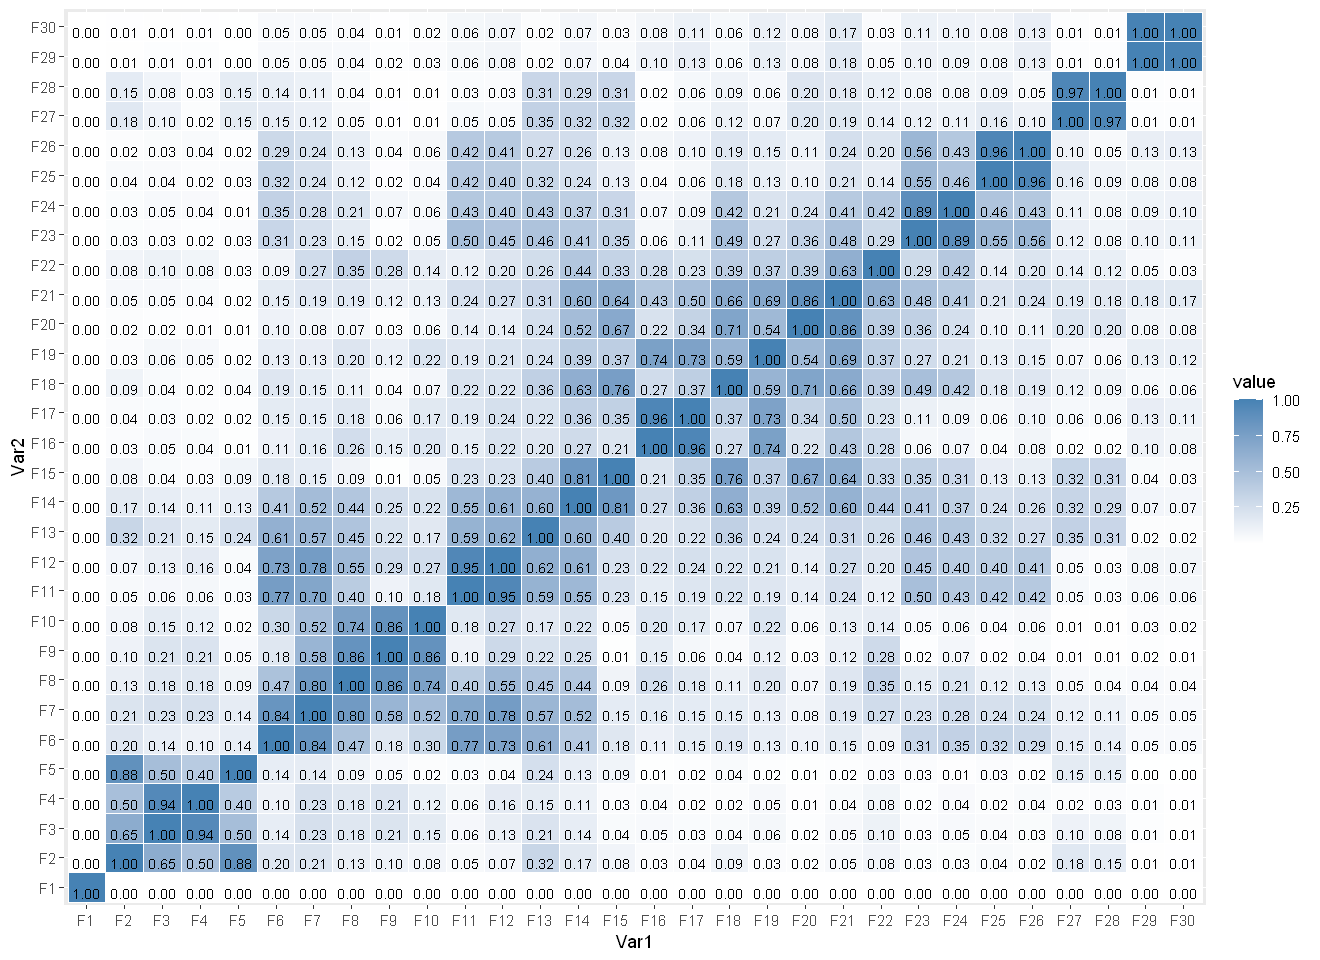

In [83]:
df_price_2 <- df_2 %>% select(Price)
ts_df_price_2 <- as.ts(df_price_2)
# Стадия декомпозиции
L = 30  # Окно
s_2 <- ssa(df_price_2, L = L)
corr_2 <- melt(wcor(s_2)[-31, ])  # Корреляции в более удобном формате для сравнений


fig(11, 8)
ggplot(data = corr_2, aes(x = Var1, y = Var2)) +
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = sprintf("%1.2f",value)), vjust = 1, size=3) +
  scale_fill_gradient(low = "white", high = "steelblue")

In [84]:
# Группировка по наибольшм корреляциям (threshold = 0.6)
group_by_max_corr(corr_2)

# Группировка по наибольшм корреляциям (threshold = 0.7)
group_by_max_corr(corr_2, threshold=0.7)

# Опять же, действительно кажется удачным объединить 19 вектор с 16 и 17, а 18 с 14, 15, 20, 21
# На этих данных особенно заметно, что такой способ группировки способен находить на первый взгляд не самые очедные закономерности

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15 19 20

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 21

[[11]]
[1] 22 23 25

[[12]]
[1] 24

[[13]]
[1] 26 27 28

[[14]]
[1] 29 30

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23 25

[[13]]
[1] 24

[[14]]
[1] 26 27

[[15]]
[1] 28

[[16]]
[1] 29 30

In [85]:
# Цепная группировка (threshold=0.6)
corr_chain(corr_2)

# Цепная группировка (threshold=0.7)
corr_chain(corr_2, threshold=0.7)

# Не очень удачно объединять 2-5 компоненты, так как мы теряем информацию о том, что 2 и 5 компоненты соединены особенно сильно...

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 19 20

[[11]]
[1] 21

[[12]]
[1] 22 23

[[13]]
[1] 24

[[14]]
[1] 25

[[15]]
[1] 26 27 28

[[16]]
[1] 29 30

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3 4

[[4]]
[1] 5

[[5]]
[1] 6 7

[[6]]
[1]  8  9 10 11

[[7]]
[1] 12 13

[[8]]
[1] 14 15

[[9]]
[1] 16 17

[[10]]
[1] 18

[[11]]
[1] 19 20

[[12]]
[1] 21

[[13]]
[1] 22 23

[[14]]
[1] 24

[[15]]
[1] 25

[[16]]
[1] 26 27

[[17]]
[1] 28

[[18]]
[1] 29 30

In [86]:
# Кластерная группировка (n=3, threshold=0.6)
corr_clusters(corr_2)

# Кластерная группировка (n=3, threshold=0.7)
corr_clusters(corr_2, threshold=0.7)

[[1]]
[1] 1

[[2]]
[1] 2 3 4 5

[[3]]
[1] 6 7

[[4]]
[1]  8  9 10 11

[[5]]
[1] 12 13

[[6]]
[1] 14 15

[[7]]
[1] 16 17

[[8]]
[1] 18

[[9]]
[1] 19 20

[[10]]
[1] 21

[[11]]
[1] 22 23 24 25

[[12]]
[1] 26 27 28

[[13]]
[1] 29

[[14]]
[1] 30

[[1]]
[1] 1

[[2]]
[1] 2 3 4 5

[[3]]
[1] 6 7

[[4]]
[1]  8  9 10 11

[[5]]
[1] 12 13

[[6]]
[1] 14 15

[[7]]
[1] 16 17

[[8]]
[1] 18

[[9]]
[1] 19 20

[[10]]
[1] 21

[[11]]
[1] 22 23 24 25

[[12]]
[1] 26 27

[[13]]
[1] 28

[[14]]
[1] 29

[[15]]
[1] 30

#### Общие выводы по способам группировки

Исходя из вышенаписанного, я могу сделать вывод о том, что лучше всего проводить группировку по последовательному соединению векторов с максимальной корреляцией, т. е. группируем соответсвующие вектора и каждый раз заново считаем матрицу корреляций; продолжаем группировку до тех пор, пока наибольшая корреляция не будет меньше установленного порога. 

Такой способ помогает нам извлечь больше информации из данных, он не группирует те векторы, которые скоррелированы друг с другом только через соседей, а прямой связи не имеют, и, наоборот, группирует те векторы, которые на первый взгляд кажутся слабокоррелирующими, но на самом деле между которыми прослеживается сильная корреляция, хоть их соответствующие собственные векторы идут не подряд в порядке убывания. 

В дальнейшем я буду пользоваться именно этим способом группировки.

### Реконструкция. Избавление от шума

In [87]:
groups = group_by_max_corr(corr)
groups

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
[1] 6 7

[[5]]
[1]  8  9 10 11

[[6]]
[1] 12 13

[[7]]
[1] 14 15 19 20

[[8]]
[1] 16 17

[[9]]
[1] 18

[[10]]
[1] 21

[[11]]
[1] 22 23 25

[[12]]
[1] 24

[[13]]
[1] 26 27 28

[[14]]
[1] 29 30

In [88]:
recon <- reconstruct(s, groups = groups)
res <- residuals(recon)

__Посмотрим на получившиеся реконструированные векторы.__

In [89]:
recon_1 <- as.ts(recon$F1)
recon_2 <- as.ts(recon$F2)
recon_3 <- as.ts(recon$F3)
recon_4 <- as.ts(recon$F4)
recon_5 <- as.ts(recon$F5)
recon_6 <- as.ts(recon$F6)
recon_7 <- as.ts(recon$F7)
recon_8 <- as.ts(recon$F8)
recon_9 <- as.ts(recon$F9)
recon_10 <- as.ts(recon$F10)
recon_11 <- as.ts(recon$F11)
recon_12 <- as.ts(recon$F12)
recon_13 <- as.ts(recon$F13)
recon_14 <- as.ts(recon$F14)
recon_series <- as.ts(attributes(recon)$series)

rec_1 <- autoplot(recon_1)
rec_2 <- autoplot(recon_2)
rec_3 <- autoplot(recon_3)
rec_4 <- autoplot(recon_4)
rec_5 <- autoplot(recon_5)
rec_6 <- autoplot(recon_6)
rec_7 <- autoplot(recon_7)
rec_8 <- autoplot(recon_8)
rec_9 <- autoplot(recon_9)
rec_10 <- autoplot(recon_10)
rec_11 <- autoplot(recon_11)
rec_12 <- autoplot(recon_12)
rec_13 <- autoplot(recon_13)
rec_14 <- autoplot(recon_14)
rec_ser <- autoplot(recon_series)

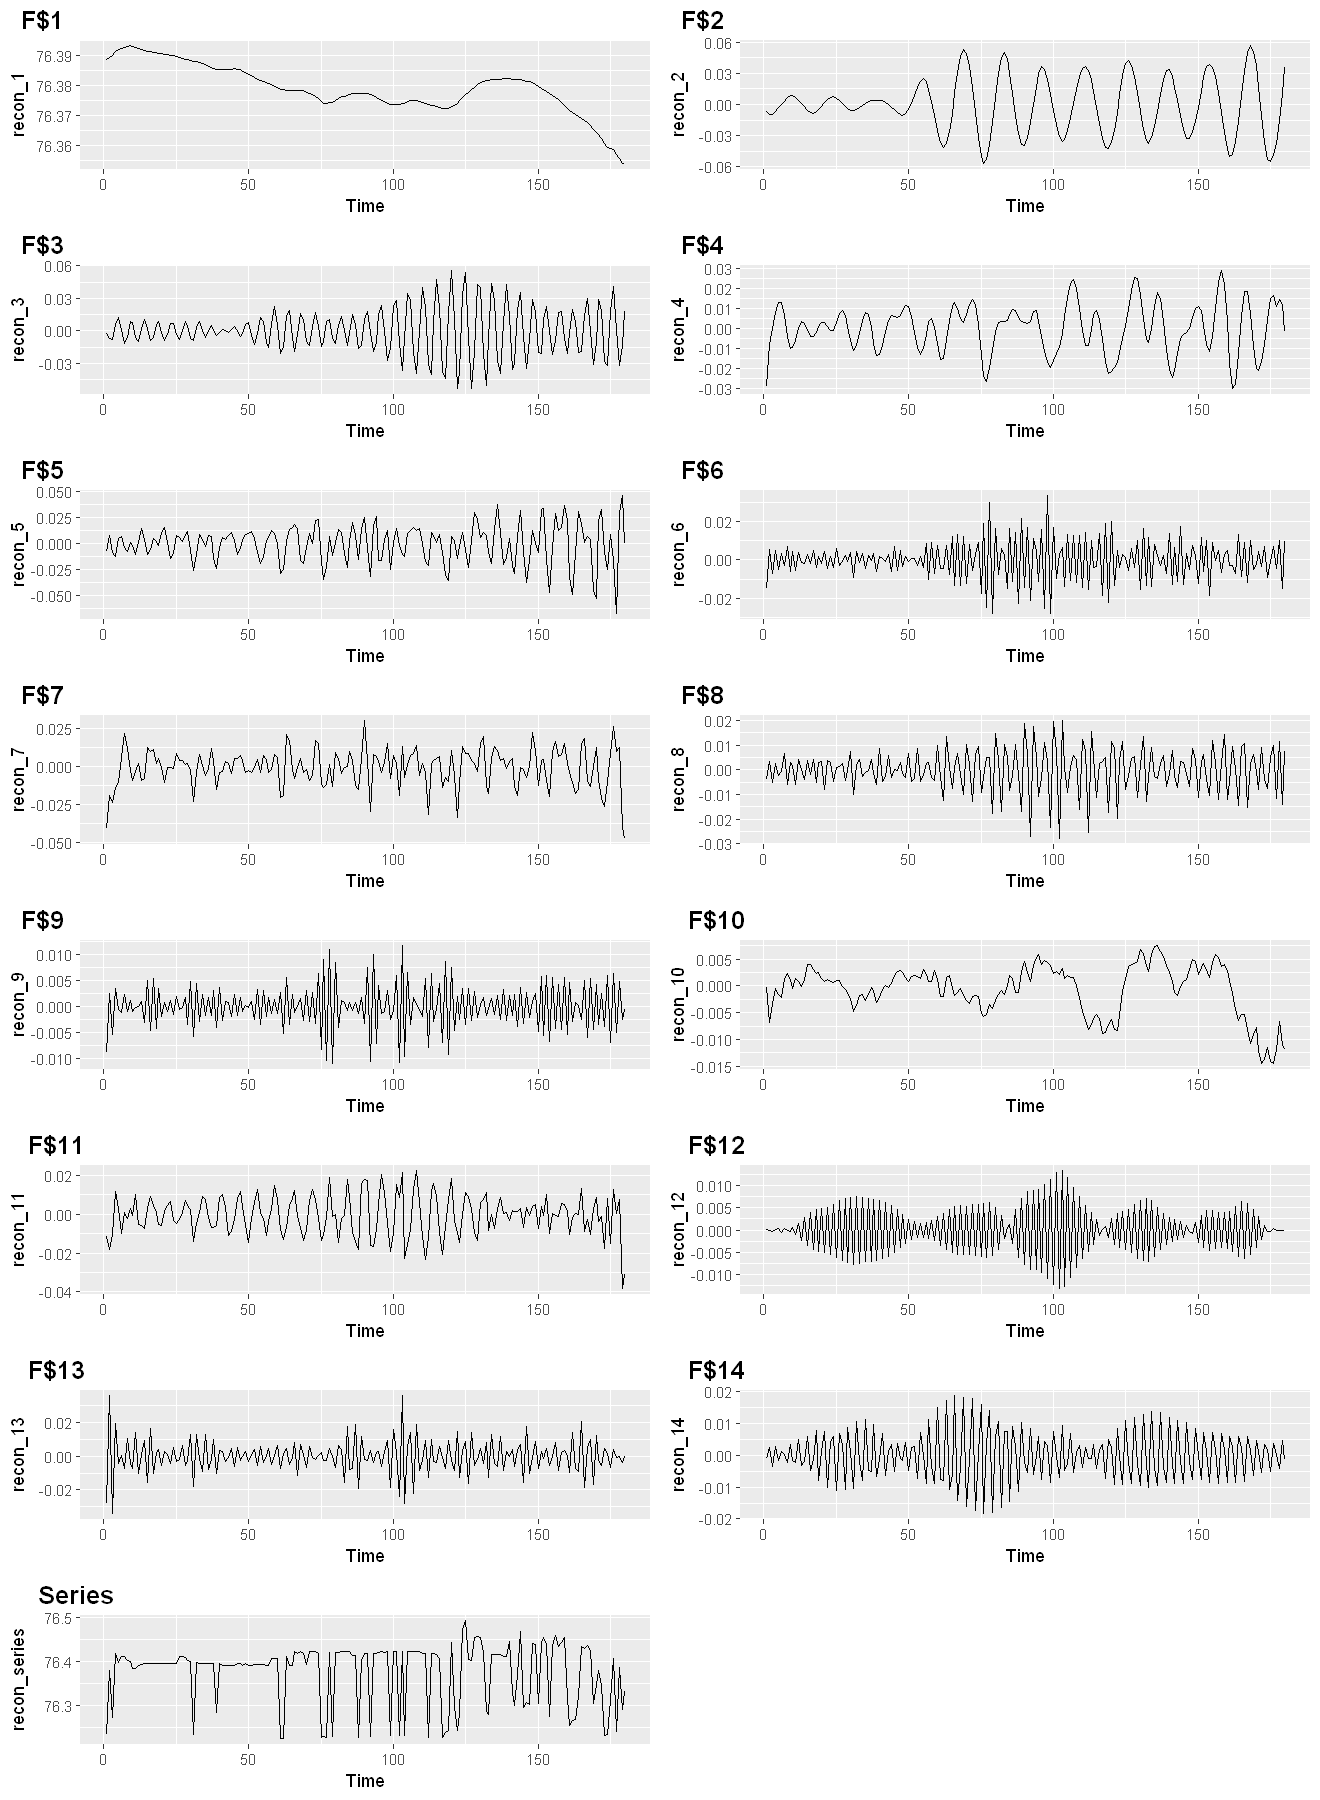

In [90]:
fig(11, 15)
ggarrange(rec_1, rec_2, rec_3, rec_4, rec_5, rec_6, rec_7, rec_8, rec_9, rec_10, rec_11, rec_12, rec_13, rec_14, rec_ser, 
          labels = c("F$1", "F$2", "F$3", "F$4", "F$5", "F$6", "F$7", "F$8", "F$9", "F$10", "F$11", "F$12", "F$13", "F$14", "Series"),
          ncol = 2, nrow = 8,  font.label = list(size = 15, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

__Посмотрим на распределение каждой из компонент и воспользуемся тестом Лиллиефорса (Колмогорова-Смирнова) для проверки объединенной компоненты на нормальность.__

In [91]:
hist_1  <- ggplot(recon$F1, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_2  <- ggplot(recon$F2, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_3  <- ggplot(recon$F3, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_4  <- ggplot(recon$F4, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_5  <- ggplot(recon$F5, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_6  <- ggplot(recon$F6, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_7  <- ggplot(recon$F7, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_8  <- ggplot(recon$F8, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_9  <- ggplot(recon$F9, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_10  <- ggplot(recon$F10, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_11  <- ggplot(recon$F11, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_12  <- ggplot(recon$F12, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_13  <- ggplot(recon$F13, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 
hist_14  <- ggplot(recon$F14, aes(x=Price)) + geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 

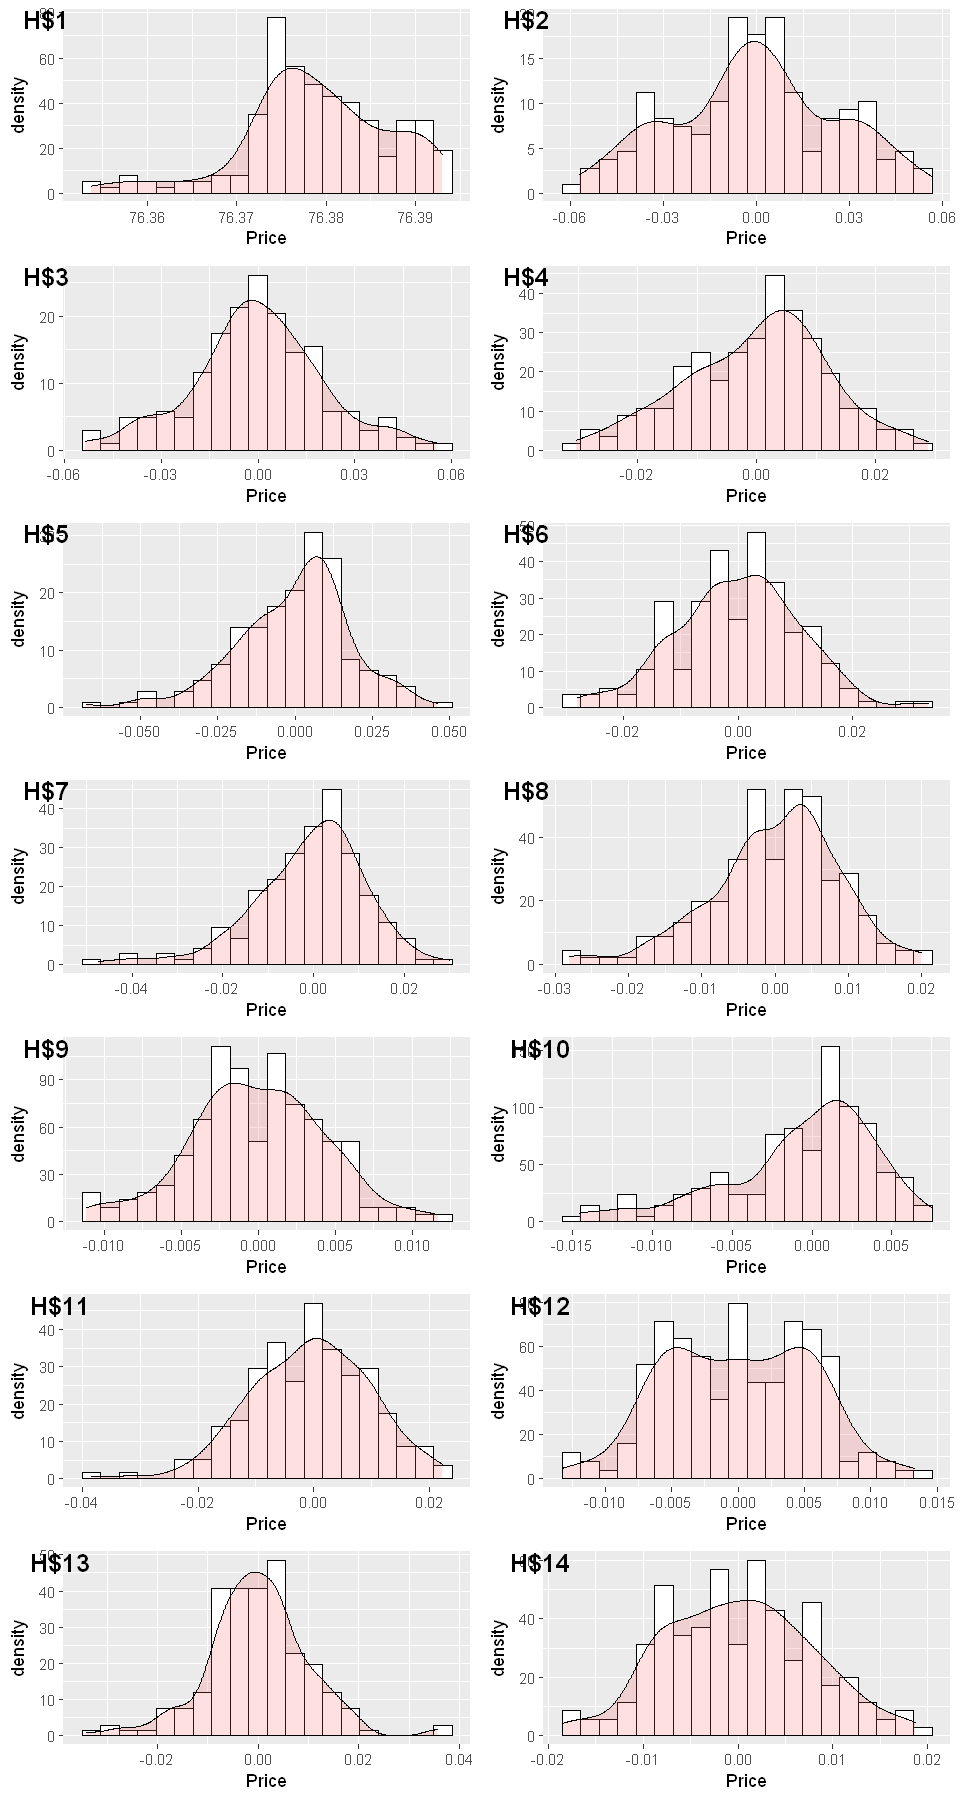

In [92]:
fig(8, 15)
ggarrange(hist_1, hist_2, hist_3, hist_4, hist_5, hist_6, hist_7, hist_8, hist_9, hist_10, hist_11, hist_12, hist_13, hist_14,
          labels = c("H$1", "H$2", "H$3", "H$4", "H$5", "H$6", "H$7", "H$8", "H$9", "H$10", "H$11", "H$12", "H$13", "H$14"),
          ncol = 2, nrow = 7,  font.label = list(size = 15, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

In [95]:
lillie.test(recon_1)
lillie.test(recon_2)
lillie.test(recon_3)
lillie.test(recon_4)
lillie.test(recon_5)
lillie.test(recon_6)
lillie.test(recon_7)
lillie.test(recon_8)
lillie.test(recon_9)
lillie.test(recon_10)
lillie.test(recon_11)
lillie.test(recon_12)
lillie.test(recon_13)
lillie.test(recon_14)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_1
D = 0.096283, p-value = 0.0003375



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_2
D = 0.067942, p-value = 0.04182



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_3
D = 0.051749, p-value = 0.282



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_4
D = 0.076491, p-value = 0.01214



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_5
D = 0.085203, p-value = 0.002839



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_6
D = 0.043205, p-value = 0.5668



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_7
D = 0.085032, p-value = 0.002926



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_8
D = 0.077518, p-value = 0.01033



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_9
D = 0.038097, p-value = 0.7556



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_10
D = 0.12089, p-value = 9.669e-07



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_11
D = 0.036892, p-value = 0.7956



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_12
D = 0.072333, p-value = 0.02268



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_13
D = 0.061767, p-value = 0.09095



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_14
D = 0.043695, p-value = 0.5485


__Кажется, что наиболее близки к нормальному распределению 3, 6, 9, 11, 14 компоненты.__

Попробуем построить график реконструированного временного ряда и исходного, и очистить его от шума (то есть исключить эти компоненты и посмотреть, что изменится).

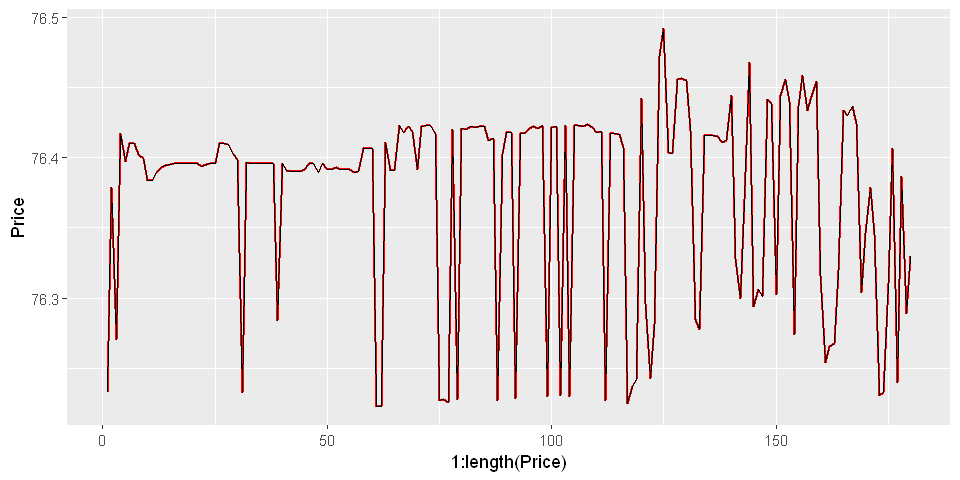

In [120]:
# Посмотрим сначала на ряд, реконструированный из всех компонент
# Он совпадает с исходным рядом

recon <- reconstruct(s, groups = list(unlist(groups[1:14])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

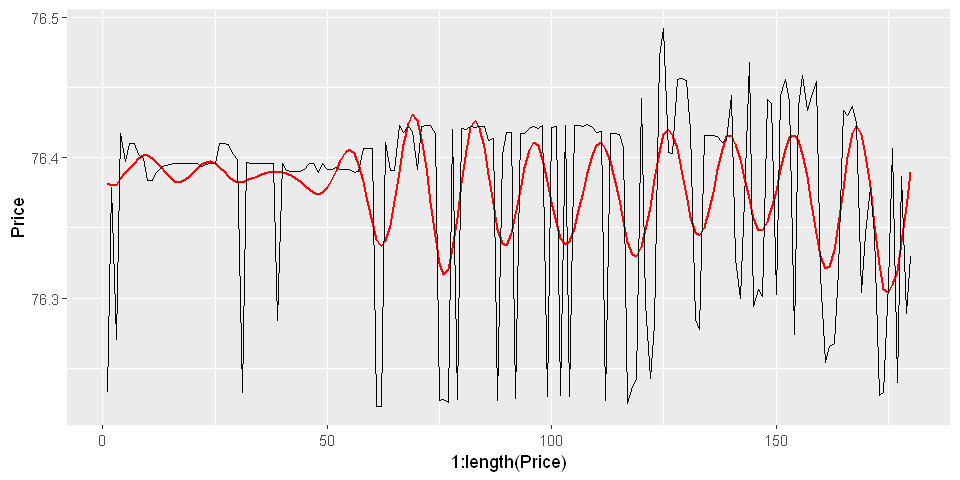

In [121]:
# Без 3 компоненты

recon <- reconstruct(s, groups = list(unlist(groups[1:2]), unlist(groups[4:14])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

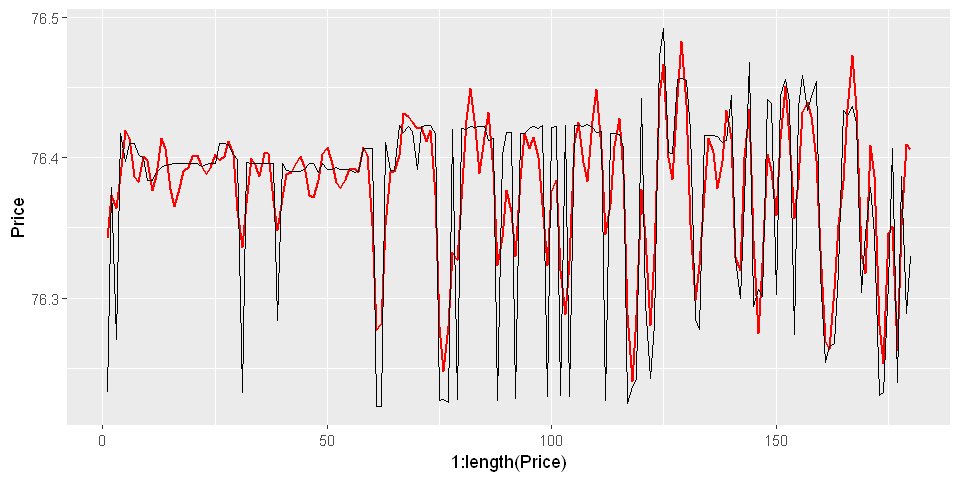

In [122]:
# Без 6 компоненты

recon <- reconstruct(s, groups = list(unlist(groups[1:5]), unlist(groups[7:14])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

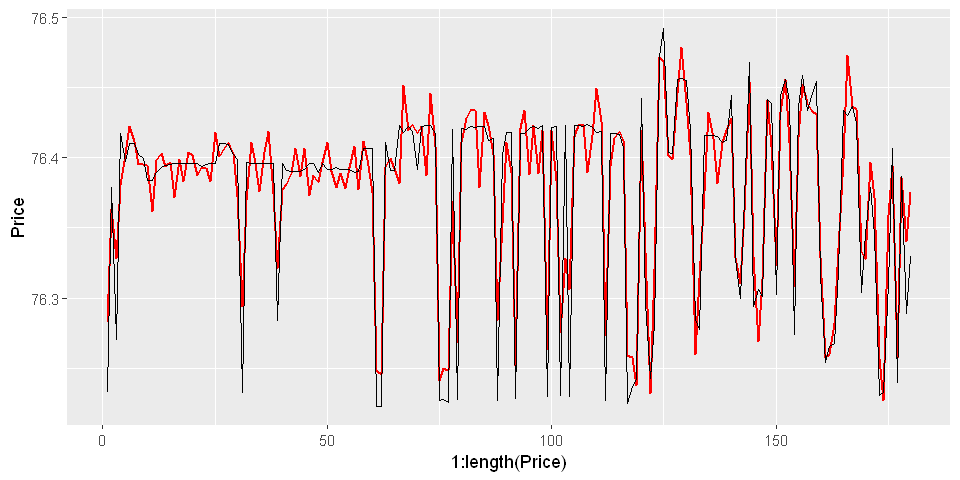

In [126]:
# Без 9 компоненты

recon <- reconstruct(s, groups = list(unlist(groups[1:8]), unlist(groups[10:14])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

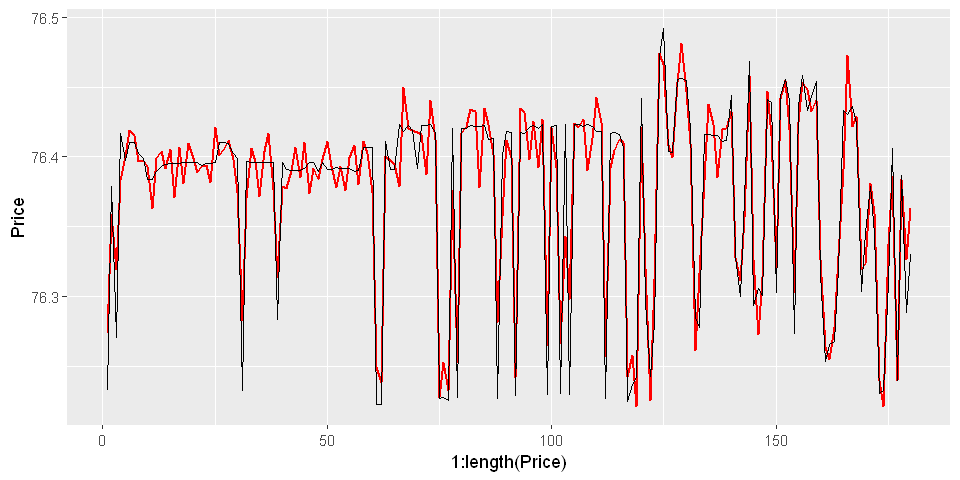

In [127]:
# Без 11 компоненты

recon <- reconstruct(s, groups = list(unlist(groups[1:10]), unlist(groups[12:14])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

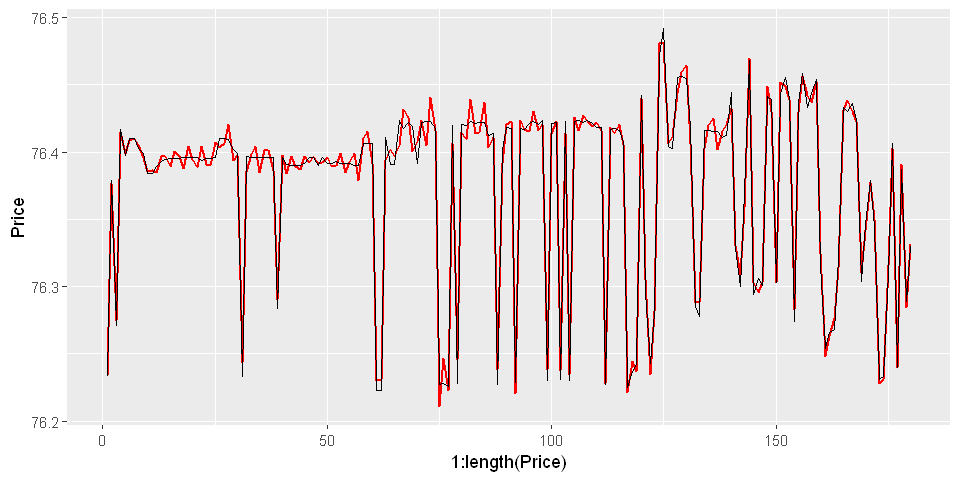

In [128]:
# Без 14 компоненты

recon <- reconstruct(s, groups = list(unlist(groups[1:13])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

__Кажется, что все, кроме 3 компоненты, можно спокойно представить как шум и скорректировать на этот шум.__ь

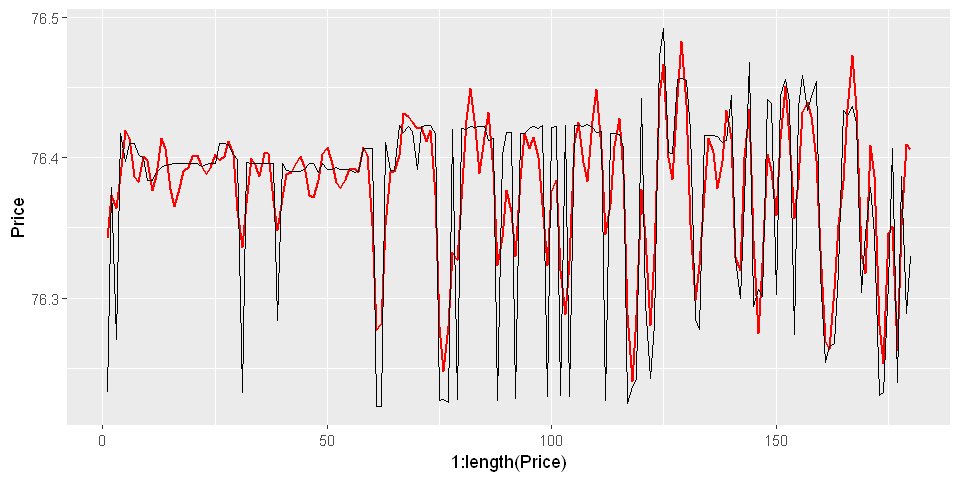

In [131]:
# Без 6, 9, 11, 14 компоненты и без 13 (там p-value > 0.05)

recon <- reconstruct(s, groups = list(unlist(groups[1:5]), unlist(groups[7:8]), unlist(groups[10]), unlist(groups[12])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

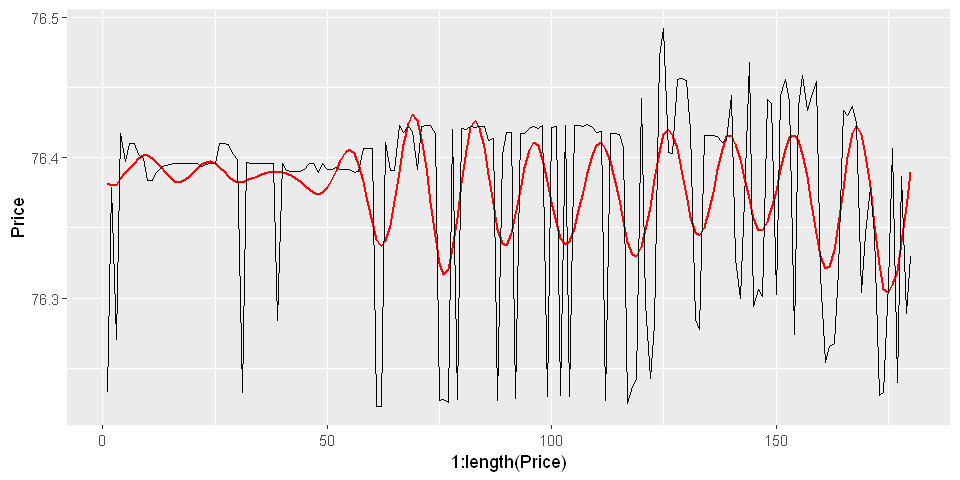

In [132]:
# Без 3, 6, 9, 11, 14 компоненты и без 13 (там p-value > 0.05)

recon <- reconstruct(s, groups = list(unlist(groups[1:2]), unlist(groups[4:5]), unlist(groups[7:8]), unlist(groups[10]), unlist(groups[12])))
res <- residuals(recon)

fig(8, 4)
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red", size=0.7) +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

__Вывод:__

- Думаю, что можно попробовать обучить ARIMA на двух последних очищенных вариантах и сравнить их с результатами на оригинальных данных

# Остальной код (что-то уже не нужно, но жалко)

__Теперь мы должны найти шум, для этого будет проводить этап реконструкции, начиная с $l - 1$ групп коррелированных векторов, каждый раз отбрасывая на одну группу больше и проверяя остаток на нормальность.__

### 1 - 2-7

In [172]:
groups

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
 [1]  6  7  8  9 10 11 12 13 14 15

[[5]]
[1] 16 17 18 19

[[6]]
[1] 20 21 22 23 24 25

[[7]]
[1] 26 27 28 29 30

In [164]:
recon <- reconstruct(s, groups = list(unlist(groups[1]), unlist(groups[2:7])))
res <- residuals(recon)

In [165]:
recon_1 <- as.ts(recon$F1)
recon_2 <- as.ts(recon$F2)
recon_residuals <- as.ts(attributes(recon)$residuals)
recon_series <- as.ts(attributes(recon)$series)

rec_1 <- autoplot(recon_1)
rec_2 <- autoplot(recon_2)
rec_res <- autoplot(recon_residuals)
rec_ser <- autoplot(recon_series)

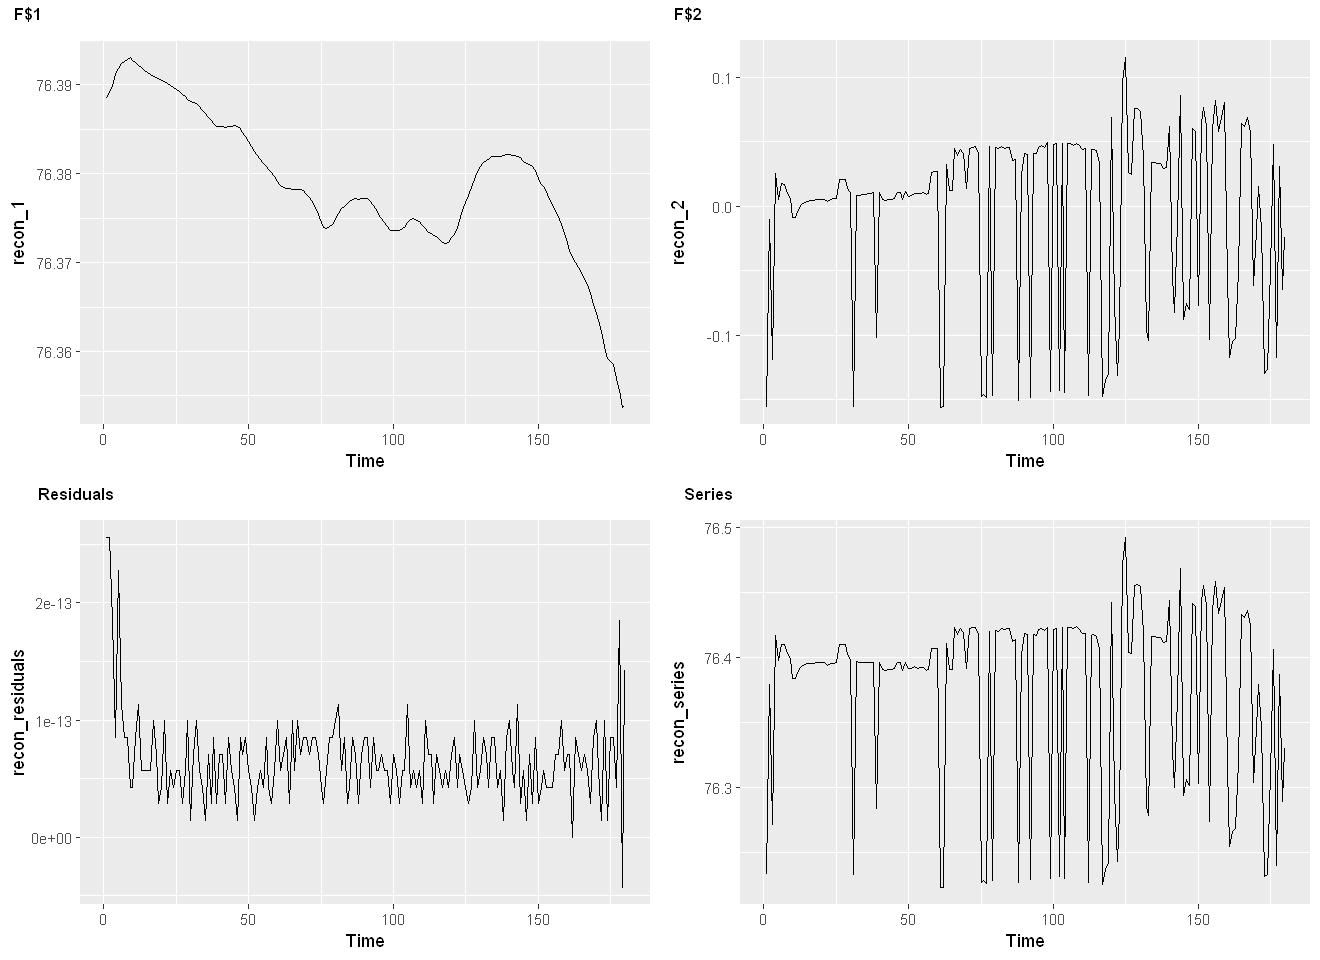

In [166]:
fig(11, 8)
ggarrange(rec_1, rec_2, rec_res, rec_ser, 
          labels = c("F$1", "F$2", "Residuals", "Series"),
          ncol = 2, nrow = 2,  font.label = list(size = 10, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

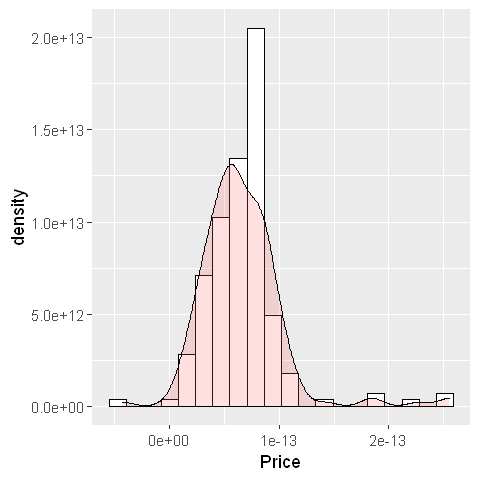

In [167]:
fig(4, 4)
ggplot(res, aes(x=Price)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 

__Пока буду использовать несколько критериев, так как они дополняют друг друга.__

In [180]:
norm_dist <- rnorm(100000, 0, 1)

In [181]:
unif_dist <- runif(100000, 0, 1)

In [182]:
lillie.test(norm_dist)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  norm_dist
D = 0.0016709, p-value = 0.7153


In [183]:
lillie.test(unif_dist)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  unif_dist
D = 0.057061, p-value < 2.2e-16


Критерий Лиллифорса (Lilliefors) является вариантом известного классического критерия Колмогорова-Смирнова, специально модифицированного для проверки нормальности.

In [24]:
lillie.test(res$Price)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  res$Price
D = 0.22273, p-value = 6.686e-08


In [26]:
cvm.test(res$Price)


	Cramer-von Mises normality test

data:  res$Price
W = 0.85145, p-value = 6.648e-09


In [28]:
 ad.test(res$Price)


	Anderson-Darling normality test

data:  res$Price
A = 4.7784, p-value = 5.599e-12


---

In [177]:
recon <- reconstruct(s, groups = groups)
res <- residuals(recon)

In [186]:
lillie.test(recon_1)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_1
D = 0.096283, p-value = 0.0003375


In [187]:
lillie.test(recon_2)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_2
D = 0.067942, p-value = 0.04182


In [188]:
lillie.test(recon_3)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_3
D = 0.051749, p-value = 0.282


In [189]:
lillie.test(recon_4)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_4
D = 0.083868, p-value = 0.003592


In [190]:
lillie.test(recon_5)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_5
D = 0.072942, p-value = 0.02075


In [191]:
lillie.test(recon_6)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_6
D = 0.059426, p-value = 0.1251


In [192]:
lillie.test(recon_7)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  recon_7
D = 0.034417, p-value = 0.8684


In [184]:
recon_1 <- as.ts(recon$F1)
recon_2 <- as.ts(recon$F2)
recon_3 <- as.ts(recon$F3)
recon_4 <- as.ts(recon$F4)
recon_5 <- as.ts(recon$F5)
recon_6 <- as.ts(recon$F6)
recon_7 <- as.ts(recon$F7)
recon_series <- as.ts(attributes(recon)$series)

rec_1 <- autoplot(recon_1)
rec_2 <- autoplot(recon_2)
rec_3 <- autoplot(recon_3)
rec_4 <- autoplot(recon_4)
rec_5 <- autoplot(recon_5)
rec_6 <- autoplot(recon_6)
rec_7 <- autoplot(recon_7)
rec_ser <- autoplot(recon_series)

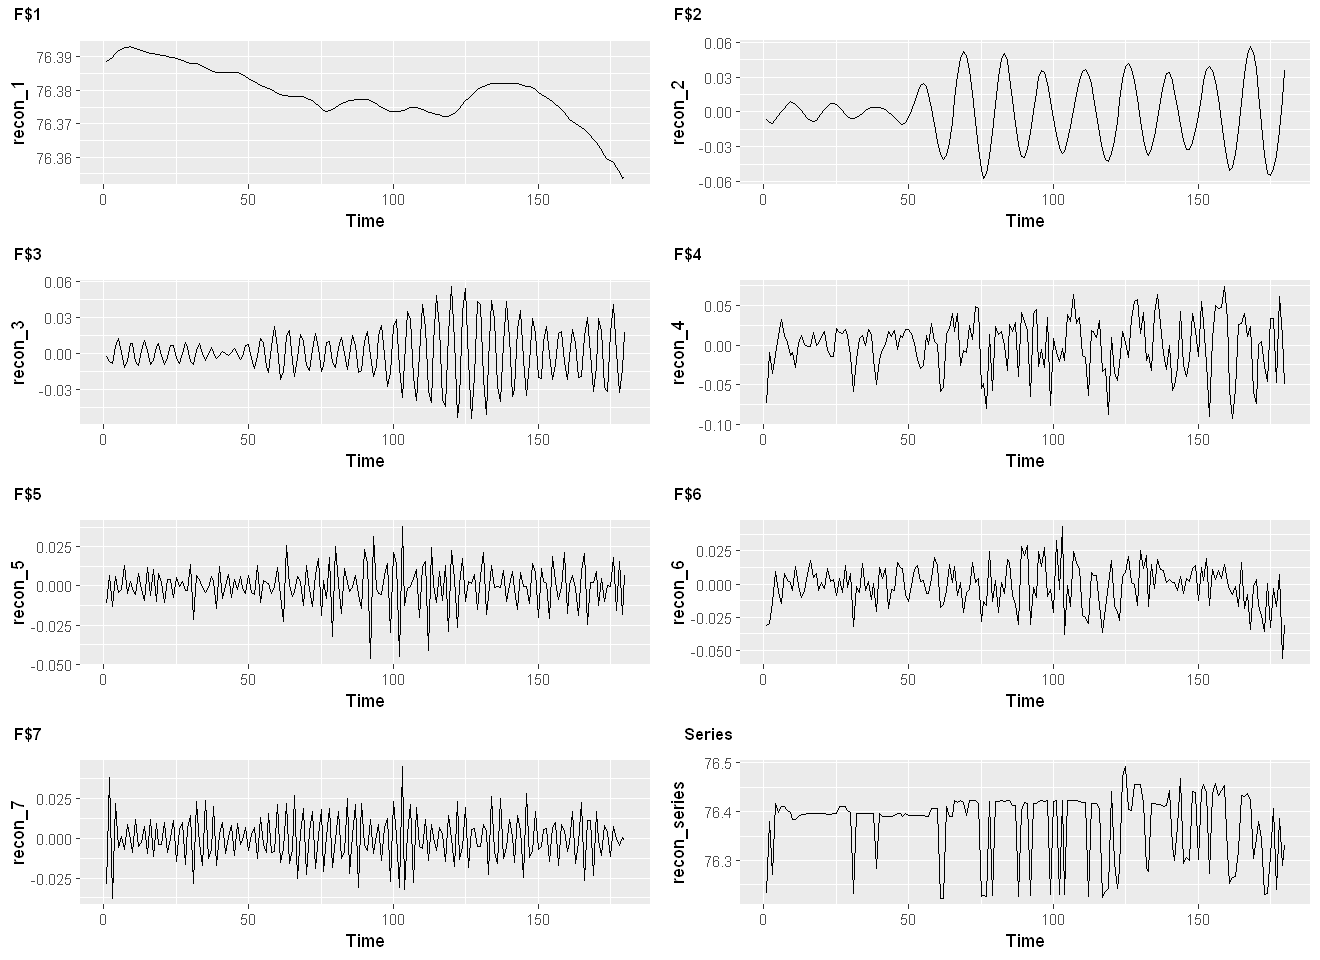

In [179]:
fig(11, 8)
ggarrange(rec_1, rec_2, rec_3, rec_4, rec_5, rec_6, rec_7, rec_ser, 
          labels = c("F$1", "F$2", "F$3", "F$4", "F$5", "F$6", "F$7", "Series"),
          ncol = 2, nrow = 4,  font.label = list(size = 10, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

### 1 - 2-6

In [195]:
groups

[[1]]
[1] 1

[[2]]
[1] 2 3

[[3]]
[1] 4 5

[[4]]
 [1]  6  7  8  9 10 11 12 13 14 15

[[5]]
[1] 16 17 18 19

[[6]]
[1] 20 21 22 23 24 25

[[7]]
[1] 26 27 28 29 30

In [173]:
recon <- reconstruct(s, groups = list(unlist(groups[1]), unlist(groups[2:6])))
res <- residuals(recon)

In [174]:
recon_1 <- as.ts(recon$F1)
recon_2 <- as.ts(recon$F2)
recon_residuals <- as.ts(attributes(recon)$residuals)
recon_series <- as.ts(attributes(recon)$series)

rec_1 <- autoplot(recon_1)
rec_2 <- autoplot(recon_2)
rec_res <- autoplot(recon_residuals)
rec_ser <- autoplot(recon_series)

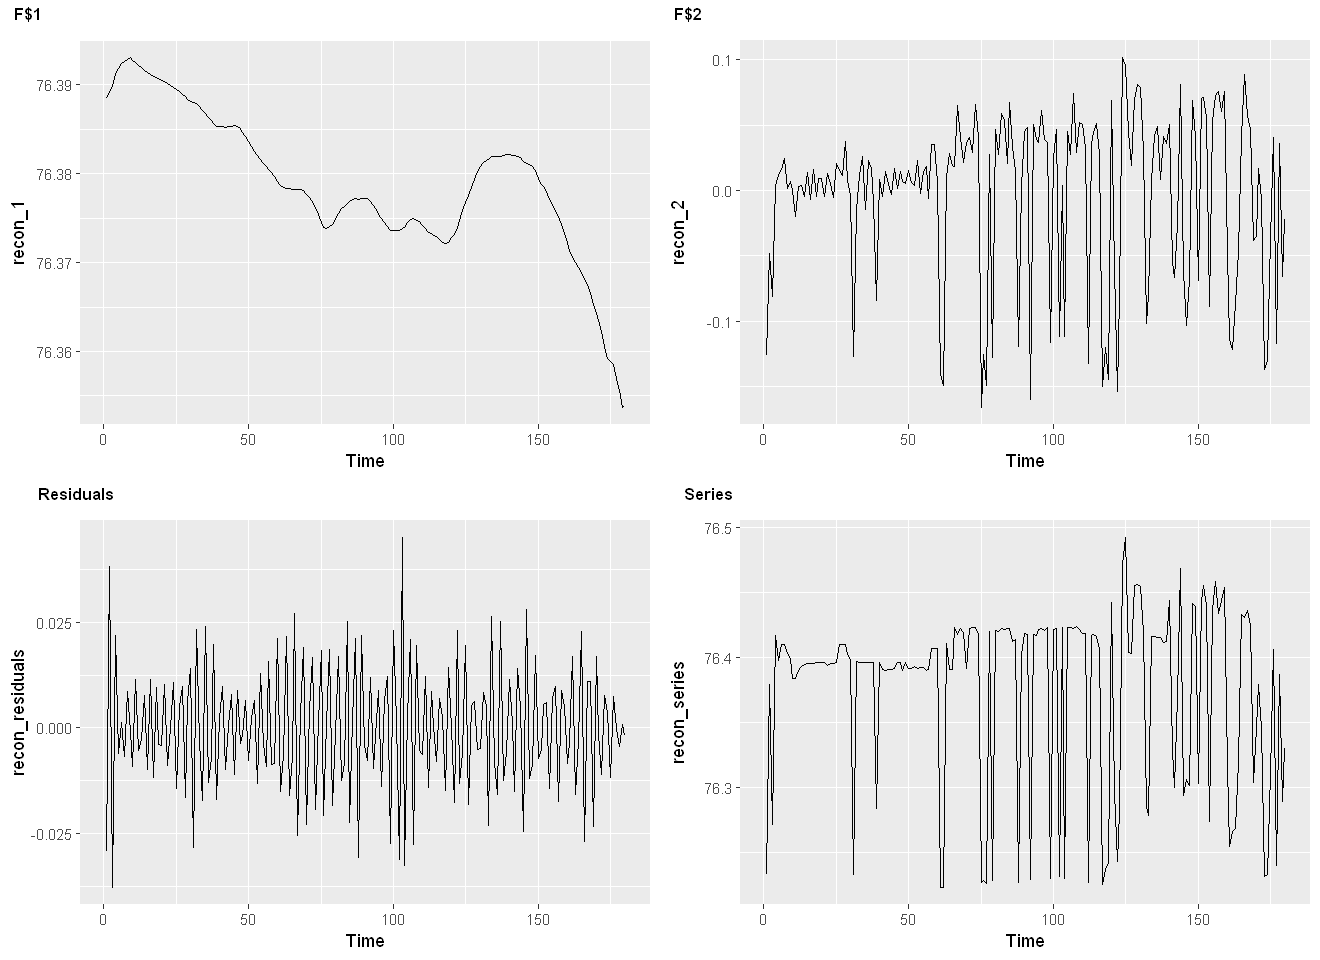

In [175]:
fig(11, 8)
ggarrange(rec_1, rec_2, rec_res, rec_ser, 
          labels = c("F$1", "F$2", "Residuals", "Series"),
          ncol = 2, nrow = 2,  font.label = list(size = 10, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

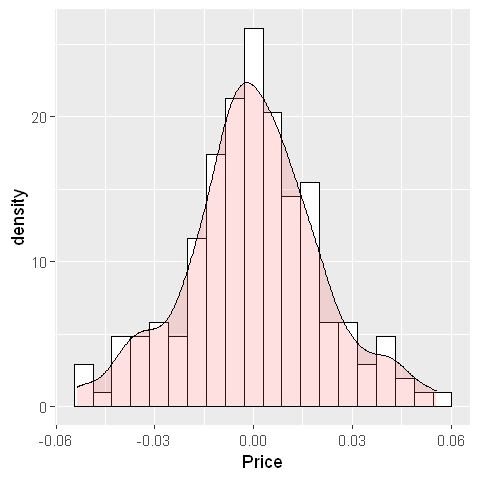

In [194]:
fig(4, 4)
ggplot(recon$F3, aes(x=Price)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 

In [255]:
recon <- reconstruct(s, groups = list(unlist(groups[1:3])))
res <- residuals(recon)

In [256]:
recon_1 <- as.ts(recon$F1)
recon_residuals <- as.ts(attributes(recon)$residuals)
recon_series <- as.ts(attributes(recon)$series)

rec_1 <- autoplot(recon_1)
rec_res <- autoplot(recon_residuals)
rec_ser <- autoplot(recon_series)

In [123]:
ggplot() + 
    geom_line(data=recon$F1, aes(x=1:length(Price), y=Price), colour="red") +
    geom_line(data=attributes(recon)$series, aes(x=1:length(Price), y=Price))

ERROR: Error in fortify(data): объект 'recon' не найден


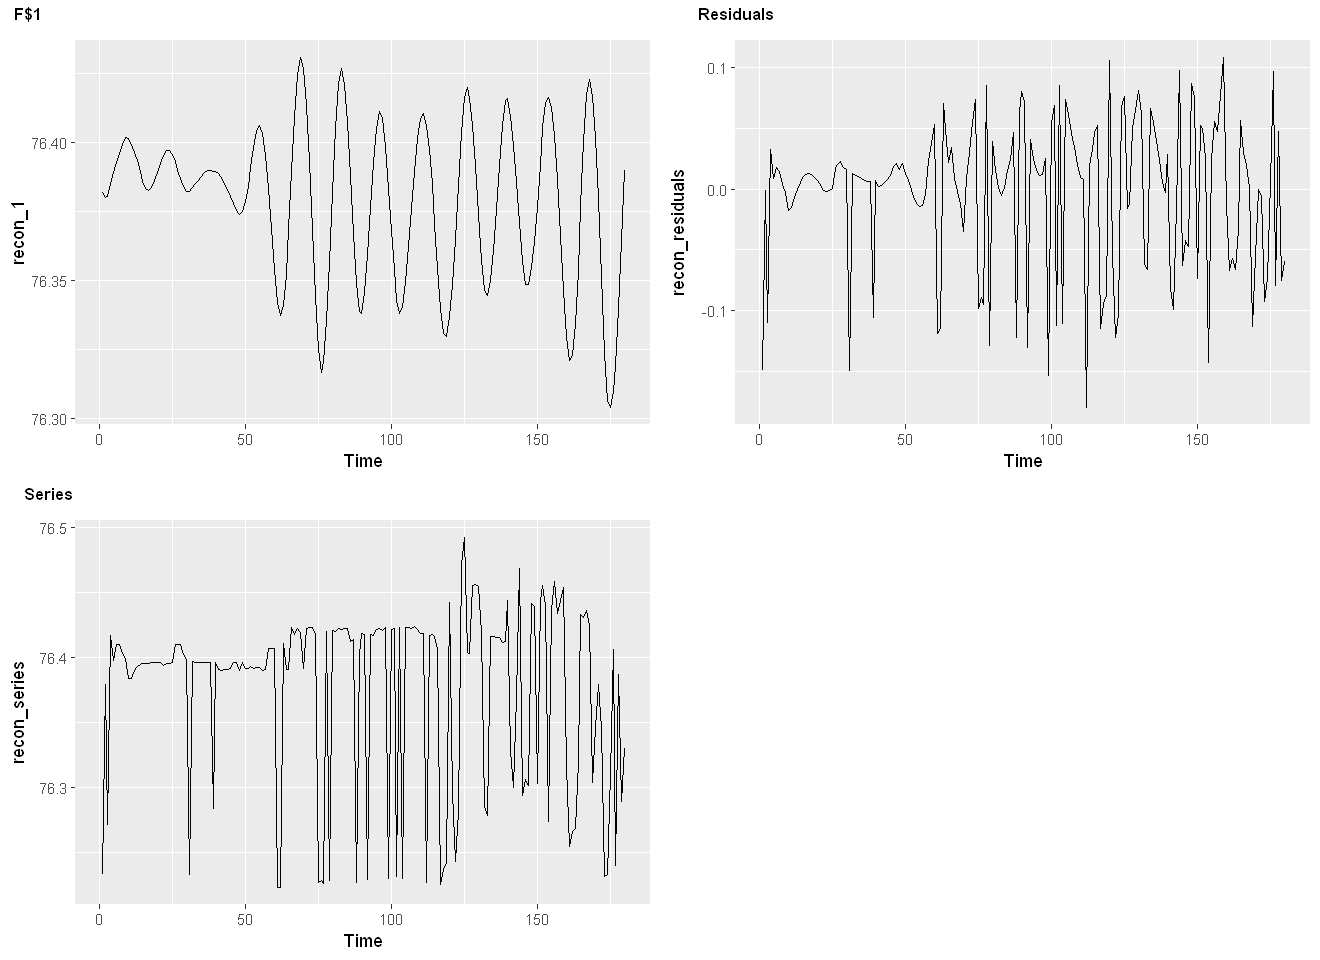

In [250]:
fig(11, 8)
ggarrange(rec_1, rec_res, rec_ser, 
          labels = c("F$1", "Residuals", "Series"),
          ncol = 2, nrow = 2,  font.label = list(size = 10, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

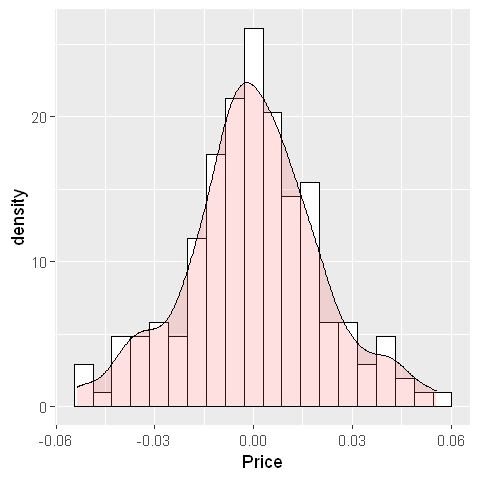

In [194]:
fig(4, 4)
ggplot(recon$F3, aes(x=Price)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 

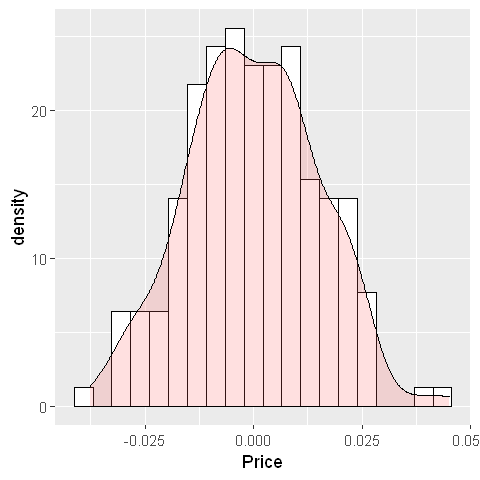

In [176]:
fig(4, 4)
ggplot(res, aes(x=Price)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 

__Пока буду использовать несколько критериев, так как они дополняют друг друга.__

Критерий Лиллифорса (Lilliefors) является вариантом известного классического критерия Колмогорова-Смирнова, специально модифицированного для проверки нормальности.

In [121]:
lillie.test(res$Price)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  res$Price
D = 0.034417, p-value = 0.8684


In [122]:
cvm.test(res$Price)


	Cramer-von Mises normality test

data:  res$Price
W = 0.03223, p-value = 0.8142


In [123]:
 ad.test(res$Price)


	Anderson-Darling normality test

data:  res$Price
A = 0.23212, p-value = 0.7979


---

### 1 - 2-5

In [144]:
recon <- reconstruct(s, groups = list(unlist(groups[1]), unlist(groups[3:5])))
res <- residuals(recon)

In [145]:
recon_1 <- as.ts(recon$F1)
recon_2 <- as.ts(recon$F2)
recon_residuals <- as.ts(attributes(recon)$residuals)
recon_series <- as.ts(attributes(recon)$series)

rec_1 <- autoplot(recon_1)
rec_2 <- autoplot(recon_2)
rec_res <- autoplot(recon_residuals)
rec_ser <- autoplot(recon_series)

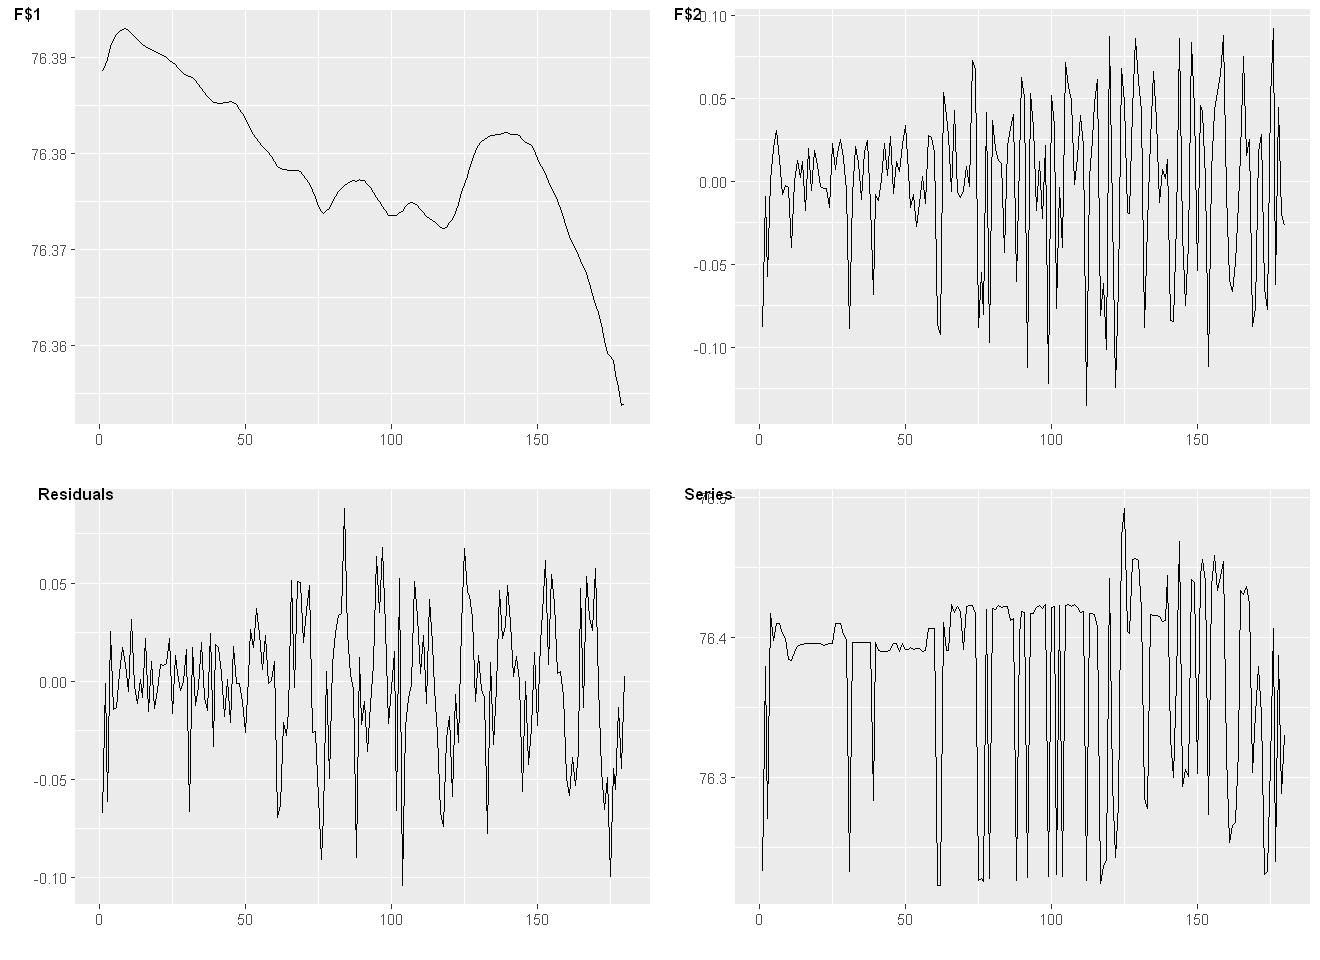

In [146]:
fig(11, 8)
ggarrange(rec_1, rec_2, rec_res, rec_ser, 
          labels = c("F$1", "F$2", "Residuals", "Series"),
          ncol = 2, nrow = 2,  font.label = list(size = 10, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

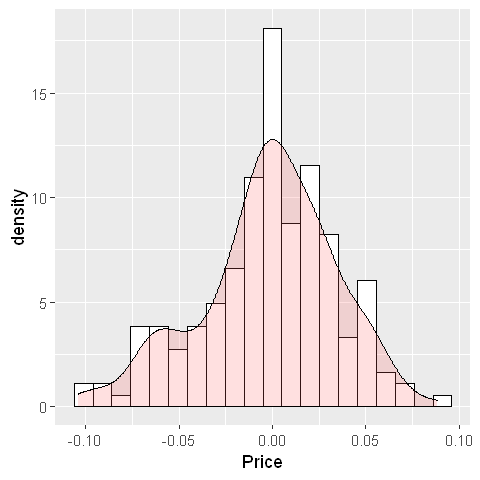

In [147]:
fig(4, 4)
ggplot(res, aes(x=Price)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 

__Пока буду использовать несколько критериев, так как они дополняют друг друга.__

Критерий Лиллифорса (Lilliefors) является вариантом известного классического критерия Колмогорова-Смирнова, специально модифицированного для проверки нормальности.

In [148]:
lillie.test(res$Price)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  res$Price
D = 0.077921, p-value = 0.009692


In [149]:
cvm.test(res$Price)


	Cramer-von Mises normality test

data:  res$Price
W = 0.19498, p-value = 0.006137


In [150]:
 ad.test(res$Price)


	Anderson-Darling normality test

data:  res$Price
A = 1.1547, p-value = 0.004984


---

### 1 - 2-4

In [151]:
recon <- reconstruct(s, groups = list(unlist(groups[1]), unlist(groups[2:7])))
res <- residuals(recon)

In [152]:
recon_1 <- as.ts(recon$F1)
recon_2 <- as.ts(recon$F2)
recon_residuals <- as.ts(attributes(recon)$residuals)
recon_series <- as.ts(attributes(recon)$series)

rec_1 <- autoplot(recon_1)
rec_2 <- autoplot(recon_2)
rec_res <- autoplot(recon_residuals)
rec_ser <- autoplot(recon_series)

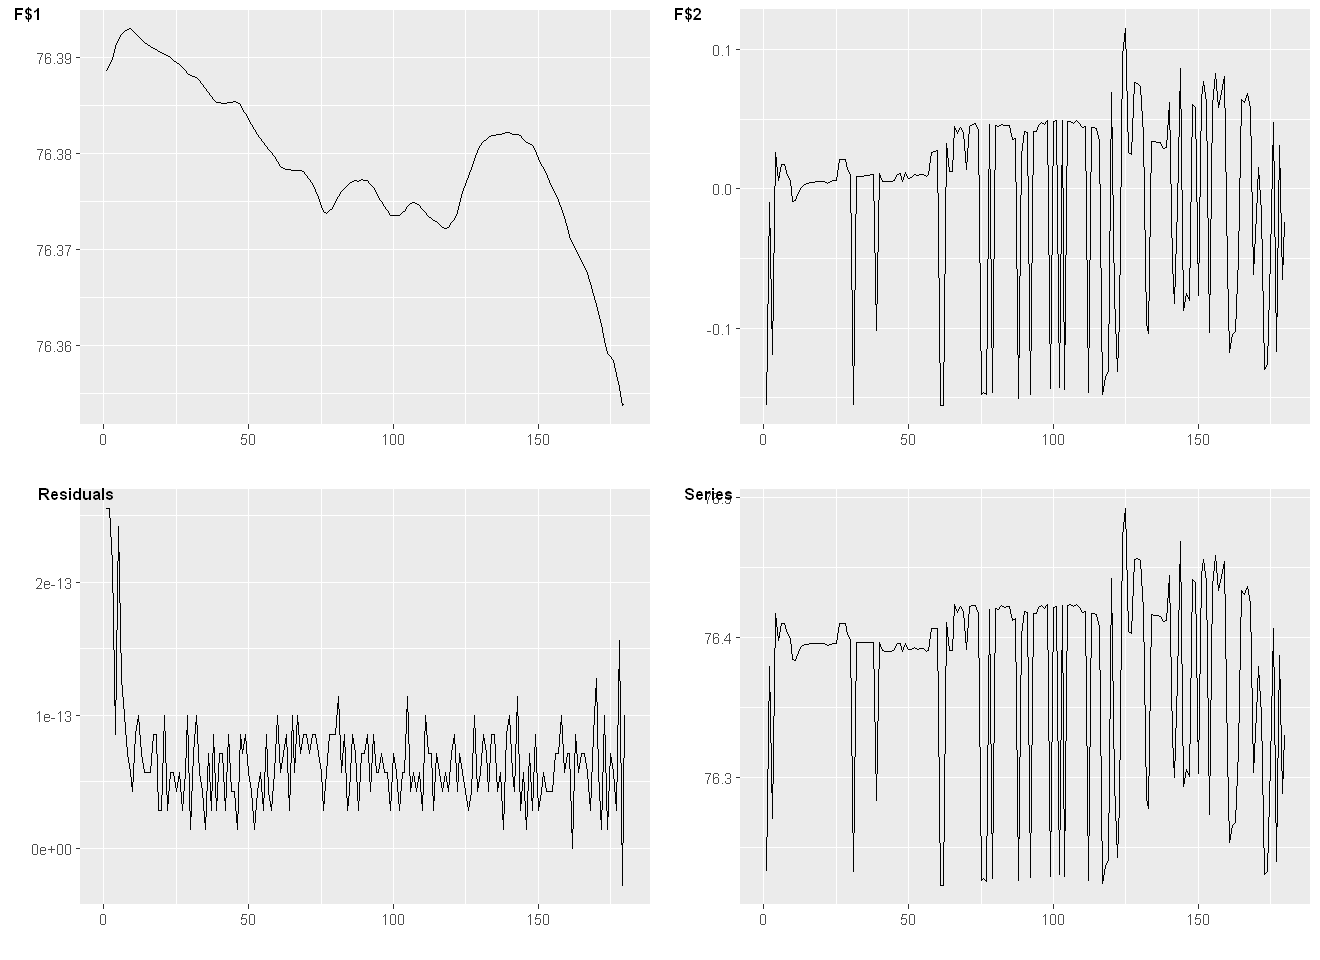

In [153]:
fig(11, 8)
ggarrange(rec_1, rec_2, rec_res, rec_ser, 
          labels = c("F$1", "F$2", "Residuals", "Series"),
          ncol = 2, nrow = 2,  font.label = list(size = 10, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

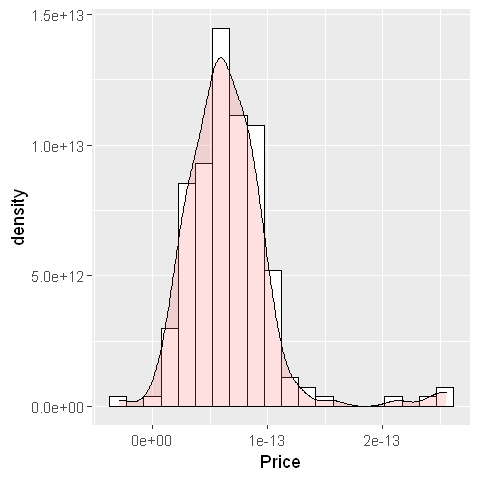

In [154]:
fig(4, 4)
ggplot(res, aes(x=Price)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 

__Пока буду использовать несколько критериев, так как они дополняют друг друга.__

Критерий Лиллифорса (Lilliefors) является вариантом известного классического критерия Колмогорова-Смирнова, специально модифицированного для проверки нормальности.

In [155]:
lillie.test(res$Price)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  res$Price
D = 0.16549, p-value = 4.543e-13


In [156]:
cvm.test(res$Price)


	Cramer-von Mises normality test

data:  res$Price
W = 0.91077, p-value = 3.541e-09


In [157]:
 ad.test(res$Price)


	Anderson-Darling normality test

data:  res$Price
A = 6.0839, p-value = 5.19e-15


---

### 1 - 2-3

In [159]:
recon <- reconstruct(s, groups = list(unlist(groups[1]), unlist(groups[2:3])))
res <- residuals(recon)

In [160]:
recon_1 <- as.ts(recon$F1)
recon_2 <- as.ts(recon$F2)
recon_residuals <- as.ts(attributes(recon)$residuals)
recon_series <- as.ts(attributes(recon)$series)

rec_1 <- autoplot(recon_1)
rec_2 <- autoplot(recon_2)
rec_res <- autoplot(recon_residuals)
rec_ser <- autoplot(recon_series)

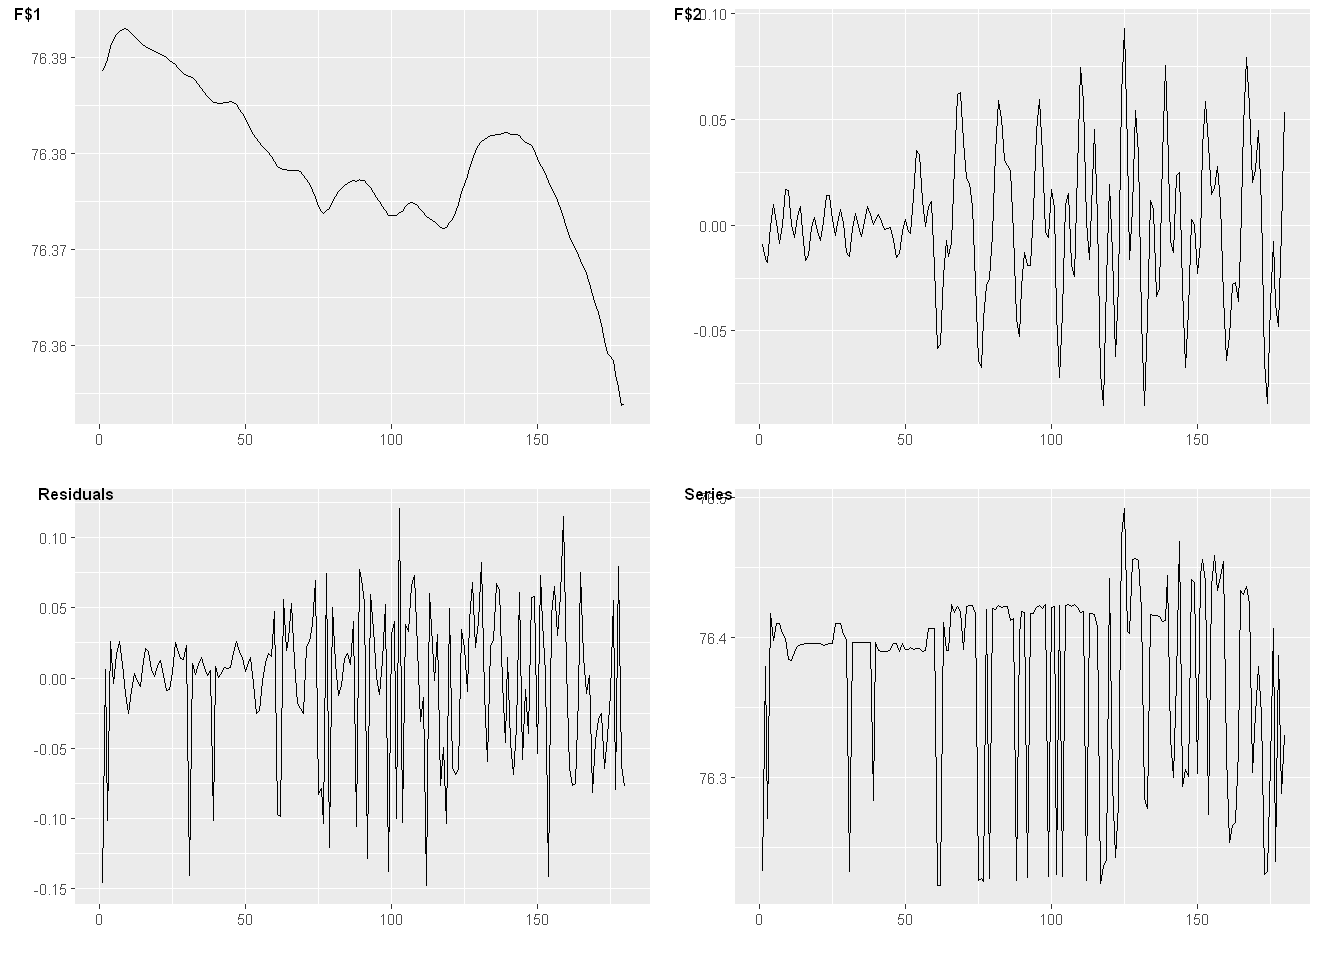

In [161]:
fig(11, 8)
ggarrange(rec_1, rec_2, rec_res, rec_ser, 
          labels = c("F$1", "F$2", "Residuals", "Series"),
          ncol = 2, nrow = 2,  font.label = list(size = 10, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

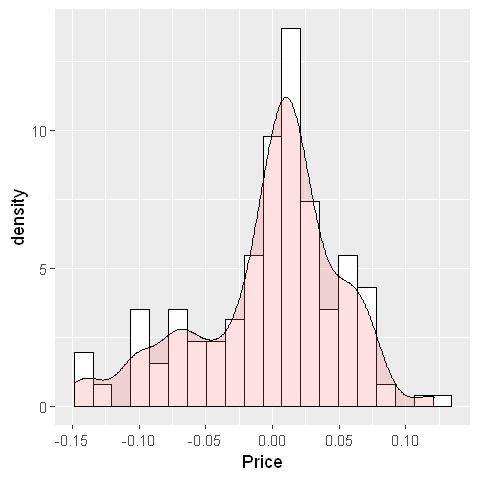

In [162]:
fig(4, 4)
ggplot(res, aes(x=Price)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 

__Пока буду использовать несколько критериев, так как они дополняют друг друга.__

Критерий Лиллифорса (Lilliefors) является вариантом известного классического критерия Колмогорова-Смирнова, специально модифицированного для проверки нормальности.

In [163]:
lillie.test(res$Price)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  res$Price
D = 0.13769, p-value = 7.285e-09


In [164]:
cvm.test(res$Price)


	Cramer-von Mises normality test

data:  res$Price
W = 0.70009, p-value = 6.153e-08


In [165]:
 ad.test(res$Price)


	Anderson-Darling normality test

data:  res$Price
A = 3.6421, p-value = 3.996e-09


---

### 1 - 2

In [166]:
recon <- reconstruct(s, groups = list(unlist(groups[1]), unlist(groups[2])))
res <- residuals(recon)

In [167]:
recon_1 <- as.ts(recon$F1)
recon_2 <- as.ts(recon$F2)
recon_residuals <- as.ts(attributes(recon)$residuals)
recon_series <- as.ts(attributes(recon)$series)

rec_1 <- autoplot(recon_1)
rec_2 <- autoplot(recon_2)
rec_res <- autoplot(recon_residuals)
rec_ser <- autoplot(recon_series)

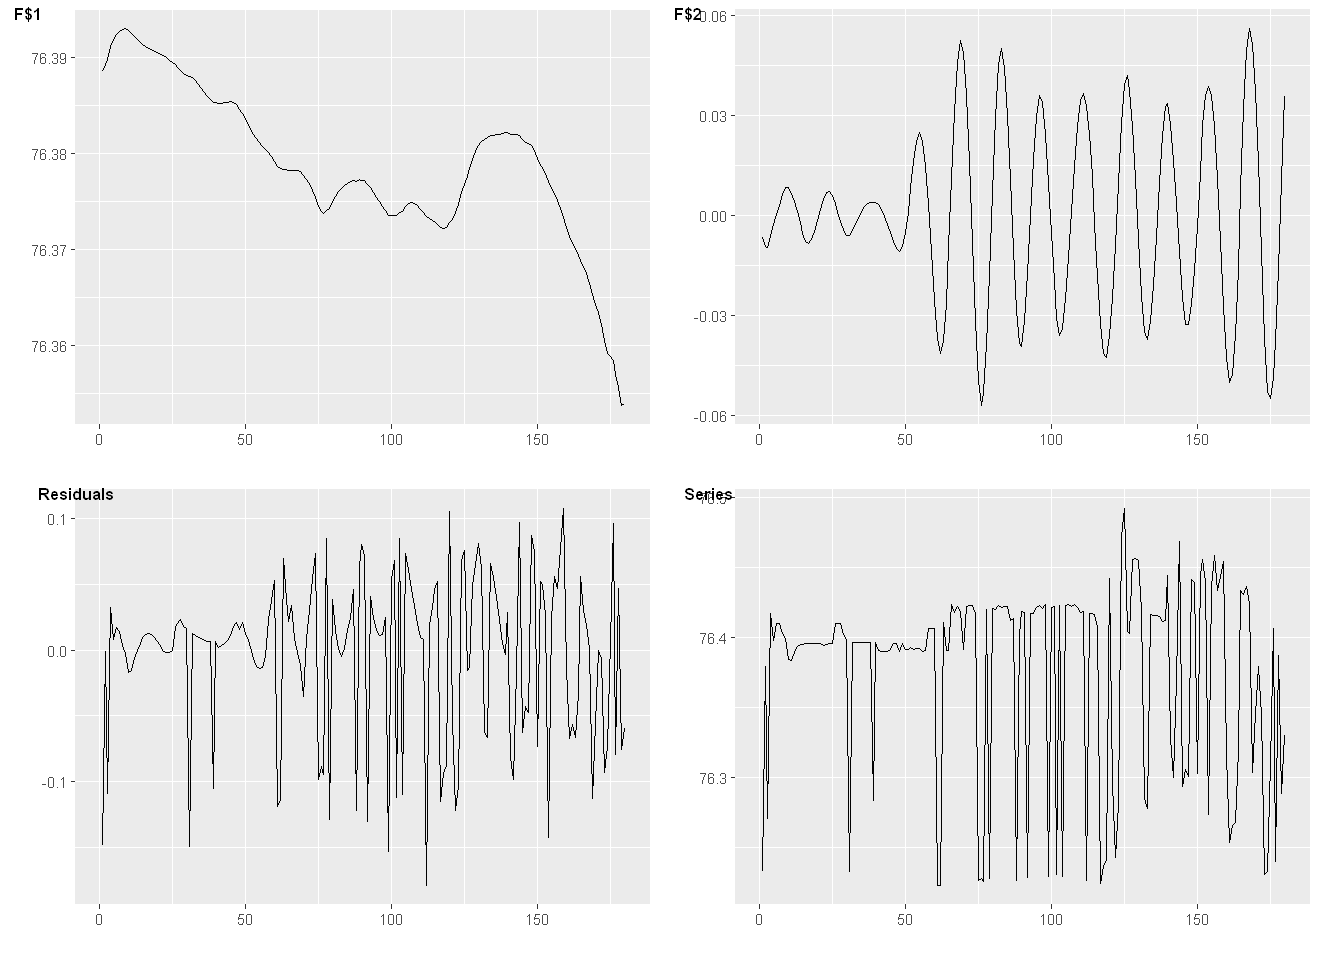

In [168]:
fig(11, 8)
ggarrange(rec_1, rec_2, rec_res, rec_ser, 
          labels = c("F$1", "F$2", "Residuals", "Series"),
          ncol = 2, nrow = 2,  font.label = list(size = 10, color = "black", face = "bold", family = NULL, position = "top"), align='hv')

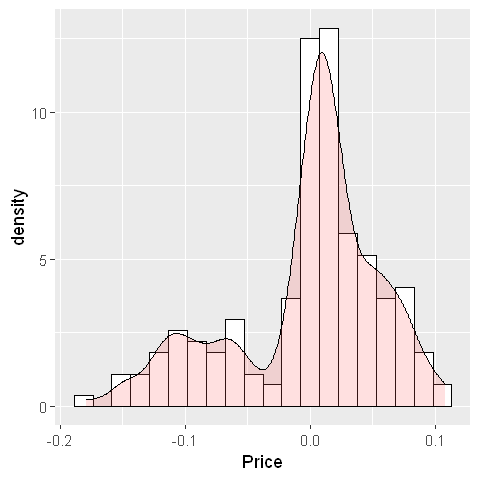

In [169]:
fig(4, 4)
ggplot(res, aes(x=Price)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white", bins=20) +
 geom_density(alpha=.2, fill="#FF6666") 

__Пока буду использовать несколько критериев, так как они дополняют друг друга.__

Критерий Лиллифорса (Lilliefors) является вариантом известного классического критерия Колмогорова-Смирнова, специально модифицированного для проверки нормальности.

In [170]:
lillie.test(res$Price)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  res$Price
D = 0.17732, p-value = 4.044e-15


In [171]:
cvm.test(res$Price)


	Cramer-von Mises normality test

data:  res$Price
W = 1.0669, p-value = 8.938e-10


In [172]:
 ad.test(res$Price)


	Anderson-Darling normality test

data:  res$Price
A = 5.3847, p-value = 2.459e-13


# ARIMA

In [100]:
head(df)

,Date,Time,Price,Returns
2021-04-20 00:01:00,1618866060,00:01,76.2330,NA
2021-04-20 00:03:00,1618866180,00:03,76.3791,0.0019164929
2021-04-20 00:05:00,1618866300,00:05,76.2710,-0.0014153086
2021-04-20 00:06:00,1618866360,00:06,76.4170,0.0019142269
2021-04-20 00:08:00,1618866480,00:08,76.3975,-0.0002551788
2021-04-20 00:11:00,1618866660,00:11,76.4100,0.0001636179


In [101]:
print("Best ARIMA Model for Close Prices")
print(arimaorder(auto.arima(df$Price)))

[1] "Best ARIMA Model for Close Prices"
p d q 
1 0 0 


In [102]:
print("Best ARIMA Model for Returns")
print(arimaorder(auto.arima(df$Returns)))

[1] "Best ARIMA Model for Returns"
p d q 
1 0 3 


In [103]:
fit.closes <- Arima(df$Price, order=c(1, 0, 0))
fit.returns <- Arima(df$Returns, order=c(1, 0, 3))

In [104]:
print("AIC Closes:")
print(AIC(fit.closes))
# Вывод AIC для цен закрытия

print("AIC Returns:")
print(AIC(fit.returns))
# Аналогично для доходностей

[1] "AIC Closes:"
[1] -458.2705
[1] "AIC Returns:"
[1] -2196.272


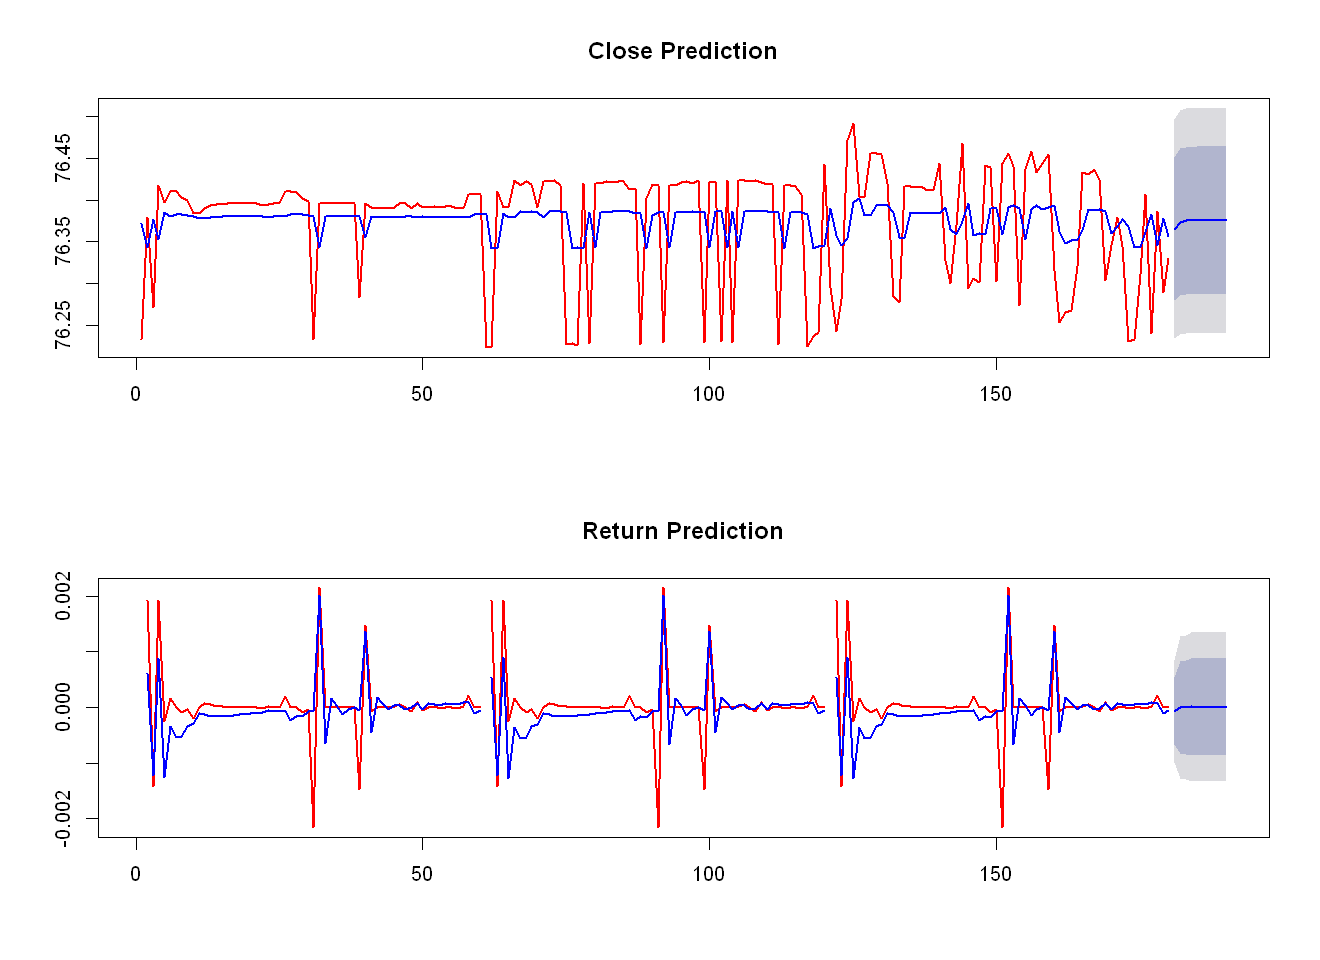

In [105]:
par(mfrow=c(2,1))
# Создаем график с 2 строками и 1 столбцом

plot(forecast(fit.closes), main='Close Prediction', lwd = 2, type="l", col="red")
lines(fitted(fit.closes),col="blue", lwd = 2)
# Добавляем цены закрытия (красные) и предсказания цен закрытия (синие)
# Если взять меньший период, чем 30 дней, эти линии будут видны
plot(forecast(fit.returns), main='Return Prediction', lwd = 2, type="l", col="red")
lines(fitted(fit.returns),col="blue", lwd = 2)
# Аналогично для доходностей

In [106]:
print('Close Price Predictions')
print(predict(fit.closes, n.ahead = 3))
# Распечатываем предсказания цены и ее диапазона (отклонение)

[1] "Close Price Predictions"
$pred
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1] 76.36542 76.37330 76.37505

$se
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1] 0.06699527 0.06863514 0.06871539



In [107]:
print('Return Predictions')
print(predict(fit.returns, n.ahead = 3))
# Аналогично для доходностей


[1] "Return Predictions"
$pred
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1] -6.904114e-05 -5.504494e-06 -4.900273e-06

$se
Time Series:
Start = 181 
End = 183 
Frequency = 1 
[1] 0.0004683565 0.0006492061 0.0006597825



In [123]:
recon$F1

,Price
2021-04-20 00:01:00,-0.0066698125
2021-04-20 00:03:00,-0.0093231208
2021-04-20 00:05:00,-0.0095856733
2021-04-20 00:06:00,-0.0062997410
2021-04-20 00:08:00,-0.0027234734
2021-04-20 00:11:00,0.0002393304
2021-04-20 00:12:00,0.0031103285
2021-04-20 00:13:00,0.0062290311
2021-04-20 00:14:00,0.0085620930
2021-04-20 00:15:00,0.0084907515


In [125]:
recon$F2

,Price
2021-04-20 00:01:00,-0.0324604909
2021-04-20 00:03:00,0.0058356932
2021-04-20 00:05:00,-0.0161556829
2021-04-20 00:06:00,-0.0047591816
2021-04-20 00:08:00,-0.0118473700
2021-04-20 00:11:00,0.0060073919
2021-04-20 00:12:00,0.0048483435
2021-04-20 00:13:00,0.0071318104
2021-04-20 00:14:00,-0.0117812580
2021-04-20 00:15:00,-0.0040009203
